In [1]:
from datetime import datetime, timedelta
from pathlib import Path

import itertools
import matplotlib
from vivarium import Artifact, InteractiveContext
import ipywidgets
import pandas as pd, numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 8)

The purpose of this notebook is to verify the LBWSG exposure implementation relative to GBD

In [2]:
path = Path('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')
path

PosixPath('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')

In [23]:
# manually updated the following parameters in the model specification file because it threw an error otherwise
    # population_size=100000
    # age_end=0.0767123287671233
    # exit_age=0.0767123287671233

sim = InteractiveContext(Path(path))

2022-01-11 09:41:30.009 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.1.population_manager.metrics as modifier to metrics
2022-01-11 09:41:30.029 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:65 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf.
2022-01-11 09:41:30.031 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Artifact base filter terms are ['draw == 0'].
2022-01-11 09:41:30.032 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact additional filter terms are None.
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

2022-01-11 09:41:33.949 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.1.adjust_target as modifier to measles.incidence_rate
2022-01-11 09:41:33.950 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.paf.1.lookup_table_34 as modifier to measles.incidence_rate.paf
2022-01-11 09:41:34.120 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.1.adjust_target as modifier to lower_respiratory_infections.incidence_rate
2022-01-11 09:41:34.121 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.paf.1.lookup_table_36 as modifier to lower_respiratory_infections.incidence_rate.paf
2022-01-11 09:41:34.122 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline child_stunting.propensity
2022-01-11 09:41:34.1

2022-01-11 09:41:39.297 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering mortality_rate.5.riskstate.moderate_acute_malnutrition.adjust_mortality_rate as modifier to mortality_rate
2022-01-11 09:41:39.568 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_severe_acute_malnutrition.transition_rate
2022-01-11 09:41:39.569 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_severe_acute_malnutrition.transition_rate.paf
2022-01-11 09:41:39.784 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_mild_child_wasting.transition_rate
2022-01-11 09:41:39.785 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_to_mild_child_wasting.transition_rate.paf
2022-01-11 09:41:3

2022-01-11 09:41:41.701 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.severe_acute_malnutrition_treatment.exposure_parameters
2022-01-11 09:41:41.702 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_treatment.propensity
2022-01-11 09:41:41.703 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline moderate_acute_malnutrition_treatment.exposure
2022-01-11 09:41:41.789 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.moderate_acute_malnutrition_treatment.exposure_parameters
2022-01-11 09:41:41.790 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline sq_lns.propensity
2022-01-11 09:41:41.791 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline sq_lns.coverage
2022-0

## Capture birthweight at initialization
For the early and late neonatal age groups

In [24]:
pop0 = sim.get_population()
pop0

,tracked,alive,age,entrance_time,sex,exit_time,location,years_of_life_lost,cause_of_death,years_lived_with_disability,...,mild_child_wasting_event_count,mild_child_wasting_event_time,susceptible_to_child_wasting_event_time,susceptible_to_child_wasting_event_count,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_diarrheal_diseases_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_diarrheal_diseases_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_lower_respiratory_infections_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_lower_respiratory_infections_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_affected_unmodeled_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_affected_unmodeled_relative_risk
0,True,alive,0.044994,2021-12-31 12:00:00,Male,NaT,Ethiopia,0.0,not_dead,0.0,...,0,NaT,NaT,0,4.244653,4.861793,4.861793,4.244653,4.861793,4.244653
1,True,alive,0.046464,2021-12-31 12:00:00,Male,NaT,Ethiopia,0.0,not_dead,0.0,...,0,NaT,NaT,0,1.019543,1.000728,1.000728,1.019543,1.000728,1.019543
2,True,alive,0.052629,2021-12-31 12:00:00,Female,NaT,Ethiopia,0.0,not_dead,0.0,...,0,NaT,NaT,0,2.288050,1.696371,1.696371,2.288050,1.696371,2.288050
3,True,alive,0.075327,2021-12-31 12:00:00,Female,NaT,Ethiopia,0.0,not_dead,0.0,...,0,2021-12-31 12:00:00,NaT,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,True,alive,0.046298,2021-12-31 12:00:00,Male,NaT,Ethiopia,0.0,not_dead,0.0,...,0,NaT,NaT,0,1.594312,1.628615,1.628615,1.594312,1.628615,1.594312
997,True,alive,0.040621,2021-12-31 12:00:00,Female,NaT,Ethiopia,0.0,not_dead,0.0,...,0,NaT,NaT,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
998,True,alive,0.034584,2021-12-31 12:00:00,Male,NaT,Ethiopia,0.0,not_dead,0.0,...,0,NaT,NaT,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
999,True,alive,0.036766,2021-12-31 12:00:00,Male,NaT,Ethiopia,0.0,not_dead,0.0,...,0,2021-12-31 12:00:00,NaT,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data = pd.concat([pop0.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop0.index),
                 sim.get_value('low_birth_weight.exposure')(pop0.index),
                 sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop0.index),
                 sim.get_value('short_gestation.exposure')(pop0.index)], 
                 axis=1).rename(columns={0:'relative_risk'})
data['age_group'] = np.where(data.age<7/365,'early_neonatal',
                           np.where(data.age<28/365,'late_neonatal',
                                   np.where(data.age<1,'post_neonatal', '1_to_5')))
data

,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,low_birth_weight.exposure,relative_risk,short_gestation.exposure,age_group
0,0.044994,Male,cat40,2580.395737,4.244653,36.164988,late_neonatal
1,0.046464,Male,cat52,3448.290620,1.019543,38.995680,late_neonatal
2,0.052629,Female,cat42,2926.178834,2.288050,37.375198,late_neonatal
3,0.075327,Female,cat54,3681.270909,1.000000,39.985003,late_neonatal
...,...,...,...,...,...,...,...
996,0.046298,Male,cat48,3447.032010,1.594312,37.096452,late_neonatal
997,0.040621,Female,cat55,3698.876285,1.000000,41.679580,late_neonatal
998,0.034584,Male,cat54,3570.268758,1.000000,39.130713,late_neonatal
999,0.036766,Male,cat55,3780.422404,1.000000,41.127959,late_neonatal


## Capture birth weight at birth and run until entirely new population of early and late neonatates

(all born into the sim rather than initialized into the sim)

In [6]:
pop_t = pop0.copy()
new_births = pd.DataFrame()
for x in list(range(0,56)):
    sim.step()
    pop_t_minus_1 = pop_t.copy()
    pop_t = sim.get_population()
    simulants = [i for i in pop_t.index if i not in pop_t_minus_1.index]
    new_births = new_births.append(pd.concat([pop_t.loc[simulants][['age','sex']],
             sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop_t.loc[simulants].index),
             sim.get_value('low_birth_weight.exposure')(pop_t.loc[simulants].index),
             sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop_t.loc[simulants].index),
             sim.get_value('short_gestation.exposure')(pop_t.loc[simulants].index)]
                                             , axis=1).rename(columns={0:'relative_risk'}))

2022-01-10 17:31:50.114 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 00:00:00
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium/framework/randomness.py:159: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  column = self.clip_to_seconds(column.astype(np.int64))
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
2022-01-10 17:33:20.107 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-01 12:00:00
2022-01-10 17:34:24.946 | DEBUG    | vivarium.framework.engine:step:142 - 2022-01-02 00:00:00
2022-01

In [7]:
new_births['age_group'] = 'birth'

## Capture birthweight at end of run

In [8]:
pop1 = sim.get_population()

In [22]:
data1 = pd.concat([pop1.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop1.index),
                 sim.get_value('low_birth_weight.exposure')(pop1.index),
                 sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop1.index),
                 sim.get_value('short_gestation.exposure')(pop1.index)]
                  , axis=1).rename(columns={0:'relative_risk'})
data1['age_group'] = np.where(data1.age<7/365,'early_neonatal',
                           np.where(data1.age<28/365,'late_neonatal',
                                   np.where(data1.age<1,'post_neonatal', '1_to_5')))
data1

,age,sex,risk_factor.low_birth_weight_and_short_gestation_exposure,low_birth_weight.exposure,relative_risk,short_gestation.exposure,age_group
157,0.027742,Male,cat23,1106.291696,79.297271,30.142248,late_neonatal
435,0.002667,Male,cat31,2282.386759,10.187393,40.465252,early_neonatal
827,0.060596,Male,cat43,2751.722732,2.857228,40.696543,late_neonatal
1045,0.049081,Male,cat31,2259.605415,7.786383,40.699952,late_neonatal
...,...,...,...,...,...,...,...
201093,0.001250,Male,cat52,3290.490054,1.000000,39.547385,early_neonatal
201094,0.000131,Female,cat55,3726.968971,1.000000,40.190626,early_neonatal
201095,0.000854,Female,cat52,3270.917903,1.065181,38.170893,early_neonatal
201096,0.000397,Female,cat55,3594.525425,1.000000,40.189295,early_neonatal


In [27]:
# export dataframe so nathaniel can verify RRs
data_prep = data.copy()
data_prep['time_point'] = 'initialization'
data1_prep = data1.copy()
data1_prep['time_point'] = '28_days'
d = pd.concat([data_prep,data1_prep])
d.to_csv('lbwsg_data.csv')

In [28]:
d.to_pickle('lbwsg_data')

# Load artifact data

In [19]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2019', f'age_end <= 5'])

In [20]:
art_exposure = art.load(f'risk_factor.low_birth_weight_and_short_gestation.exposure')['draw_0'].reset_index()
art_cats = art.load(f'risk_factor.low_birth_weight_and_short_gestation.categories')
art_exposure['bw_start'] = np.nan
art_exposure['bw_end'] = np.nan
art_exposure['ga_start'] = np.nan
art_exposure['ga_end'] = np.nan
for i in art_exposure.index:
    art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
    art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
    art_exposure['ga_start'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(', ')[0]
    art_exposure['ga_end'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(') wks')[0].split(', ')[1]
    
art_exposure['bw_mid'] = (art_exposure.bw_end - art_exposure.bw_start)/2 + art_exposure.bw_start
art_exposure['ga_mid'] = (art_exposure.ga_end - art_exposure.ga_start)/2 + art_exposure.ga_start
art_exposure['age_group'] = np.where(art_exposure.age_end==0,'birth',
                                    np.where(art_exposure.age_start==0,'early_neonatal',
                                            np.where(art_exposure.age_end < 0.08, 'late_neonatal', 'other')))
art_exposure

<ipython-input-20-bad3b1ff10d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
<ipython-input-20-bad3b1ff10d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
<ipython-input-20-bad3b1ff10d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,sex,age_start,age_end,year_start,year_end,parameter,draw_0,bw_start,bw_end,ga_start,ga_end,bw_mid,ga_mid,age_group
0,Female,-1.000000,0.000000,2019,2020,cat10,0.001853,500.0,1000.0,24.0,26.0,750.0,25.0,birth
1,Female,-1.000000,0.000000,2019,2020,cat106,0.000644,1000.0,1500.0,36.0,37.0,1250.0,36.5,birth
2,Female,-1.000000,0.000000,2019,2020,cat11,0.001160,500.0,1000.0,26.0,28.0,750.0,27.0,birth
3,Female,-1.000000,0.000000,2019,2020,cat116,0.001423,1000.0,1500.0,38.0,40.0,1250.0,39.0,birth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Male,0.019178,0.076712,2019,2020,cat89,0.001273,3000.0,3500.0,30.0,32.0,3250.0,31.0,late_neonatal
345,Male,0.019178,0.076712,2019,2020,cat90,0.000562,3500.0,4000.0,30.0,32.0,3750.0,31.0,late_neonatal
346,Male,0.019178,0.076712,2019,2020,cat95,0.003673,3000.0,3500.0,32.0,34.0,3250.0,33.0,late_neonatal
347,Male,0.019178,0.076712,2019,2020,cat96,0.002109,3500.0,4000.0,32.0,34.0,3750.0,33.0,late_neonatal


In [21]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

## Prep simulation output data

In [26]:
# merge in birthweight category values from the artifact (selecting female and birth just for a template)
def prep_simulation_data(data):
    sim_data = (data.rename(columns={'risk_factor.low_birth_weight_and_short_gestation_exposure':'parameter'})
                .merge(art_exposure.loc[(art_exposure.sex=='Female') & (art_exposure.age_end==0)]
                       [['parameter','bw_end','bw_start','bw_mid','ga_mid']], on=['parameter']))
    sim_data['count'] = 1
    num = sim_data.groupby(['sex','age_group','parameter','bw_mid','ga_mid']).sum()[['count']]
    den = sim_data.groupby(['sex','age_group']).sum()[['count']]
    prev = (num/den).reset_index()
    return prev

In [27]:
# at initialization
prev = prep_simulation_data(data)

# at birth
births = prep_simulation_data(new_births)

# at 40 days
prev1 = prep_simulation_data(data1)

In [47]:
def bar_chart(sex, age_group, prev, time, log=True):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left')
         .sort_values(by='draw_0'))

    barWidth = 0.4
    a = np.arange(len(p))
    b = [x + barWidth for x in a]
    plt.figure(dpi=200)
    plt.bar(a, p.draw_0, width=barWidth, label='Artifact')
    plt.bar(b, p['count'], width=barWidth, label='Simulation')
    plt.legend()
    plt.ylabel('Proportion')
    plt.xlabel('LBSWG category')
    if log==True:
        plt.semilogy()
    plt.xticks([])
    plt.title(f'{age_group} {sex}s {time}')

In [51]:
def plot_exposure_heat_map(sex, age_group, prev, time):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left'))
    p = p.replace(np.nan, 0)
    p['diff'] = p['count'] - p.draw_0
    p['percent_diff'] = p['diff'] / p.draw_0 * 100

    s = p.pivot_table(index='ga_mid', columns='bw_mid', values='draw_0').sort_index(ascending=False)
    s = s.replace(0,np.nan)
    s = np.log(s/(1-s))
    a = p.pivot_table(index='ga_mid', columns='bw_mid', values='percent_diff').sort_index(ascending=False)
    a = a.replace(0,np.nan)
    #a=np.log(a/(1-a))
    fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
    sns.heatmap(s, ax=ax1,annot=True,cmap="coolwarm",vmin=-11,vmax=-1.5)
    sns.heatmap(a, ax=ax2,annot=True,cmap="coolwarm",vmin=-50,vmax=50)
    ax1.set_title('Logit-transformed exposure\ndistribution from artifact')
    ax2.set_title('Simulation exposure relative\nto artifact percent difference')
    for ax in [ax1,ax2]:
        ax.set_xlabel('Birthweight midpoint (g)')
        ax.set_ylabel('Gestational age midpoint (weeks)')
    plt.subplots_adjust(right=1.8, top=1)    
    plt.suptitle(f'{age_group} {sex}s {time}',
                x=0.9, y=1.25)

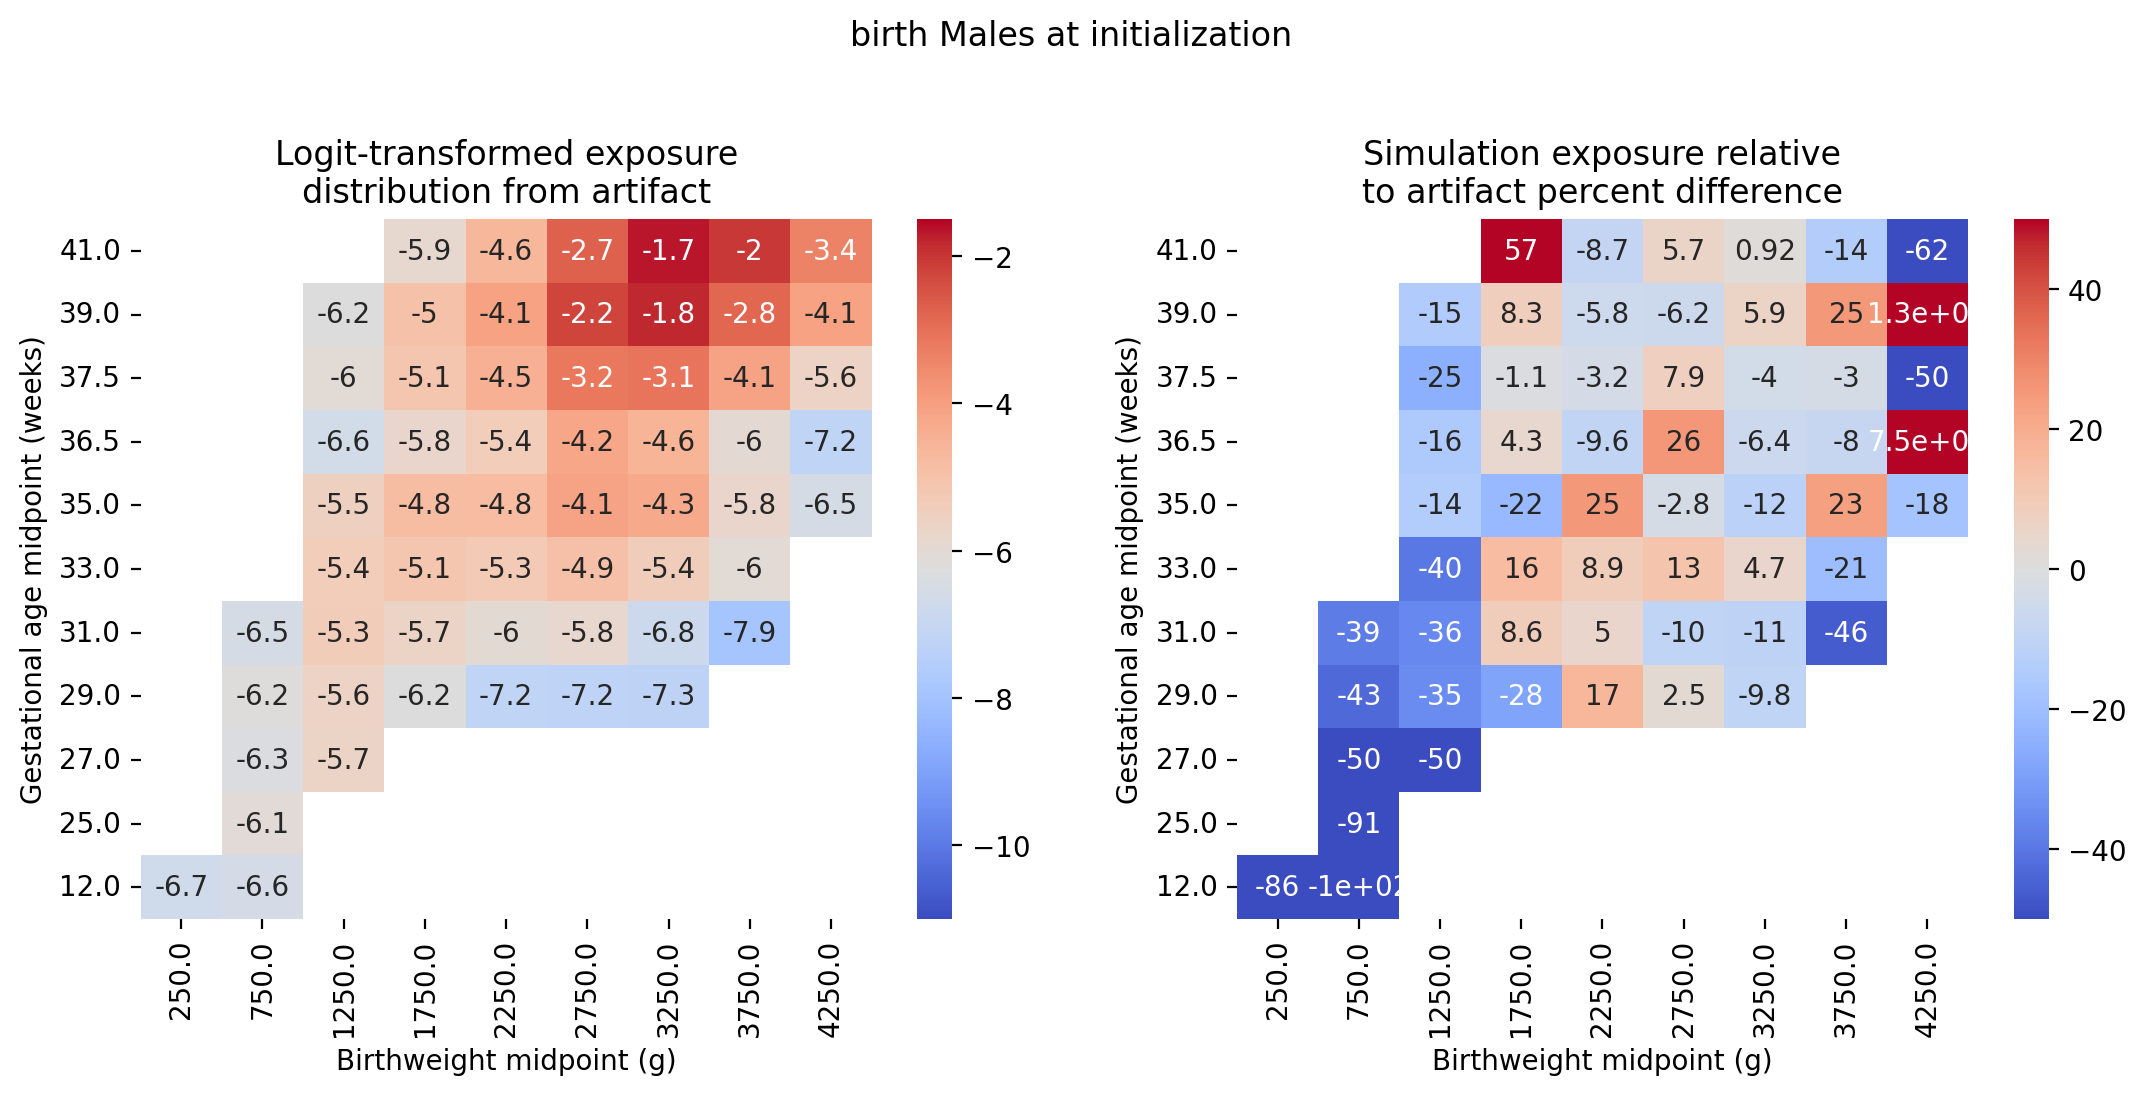

In [52]:
plot_exposure_heat_map('Male', 'birth', births, 'at initialization')

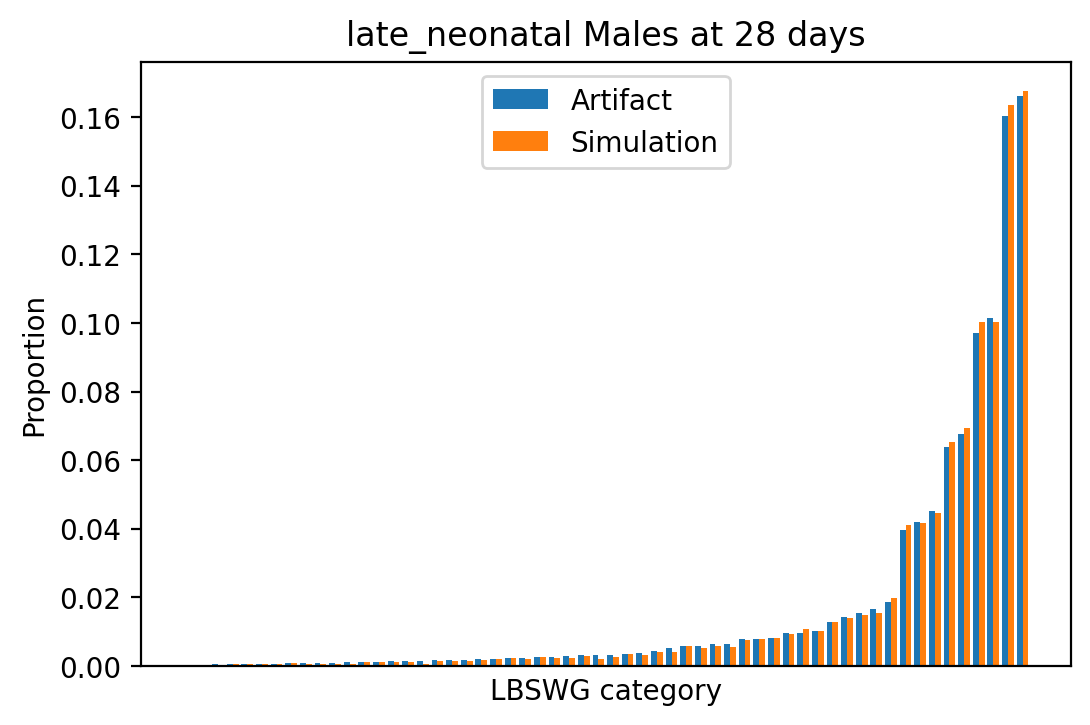

In [53]:
bar_chart('Male', 'late_neonatal', prev1, 'at 28 days', log=False)

<ipython-input-47-0723612d4acf>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=200)


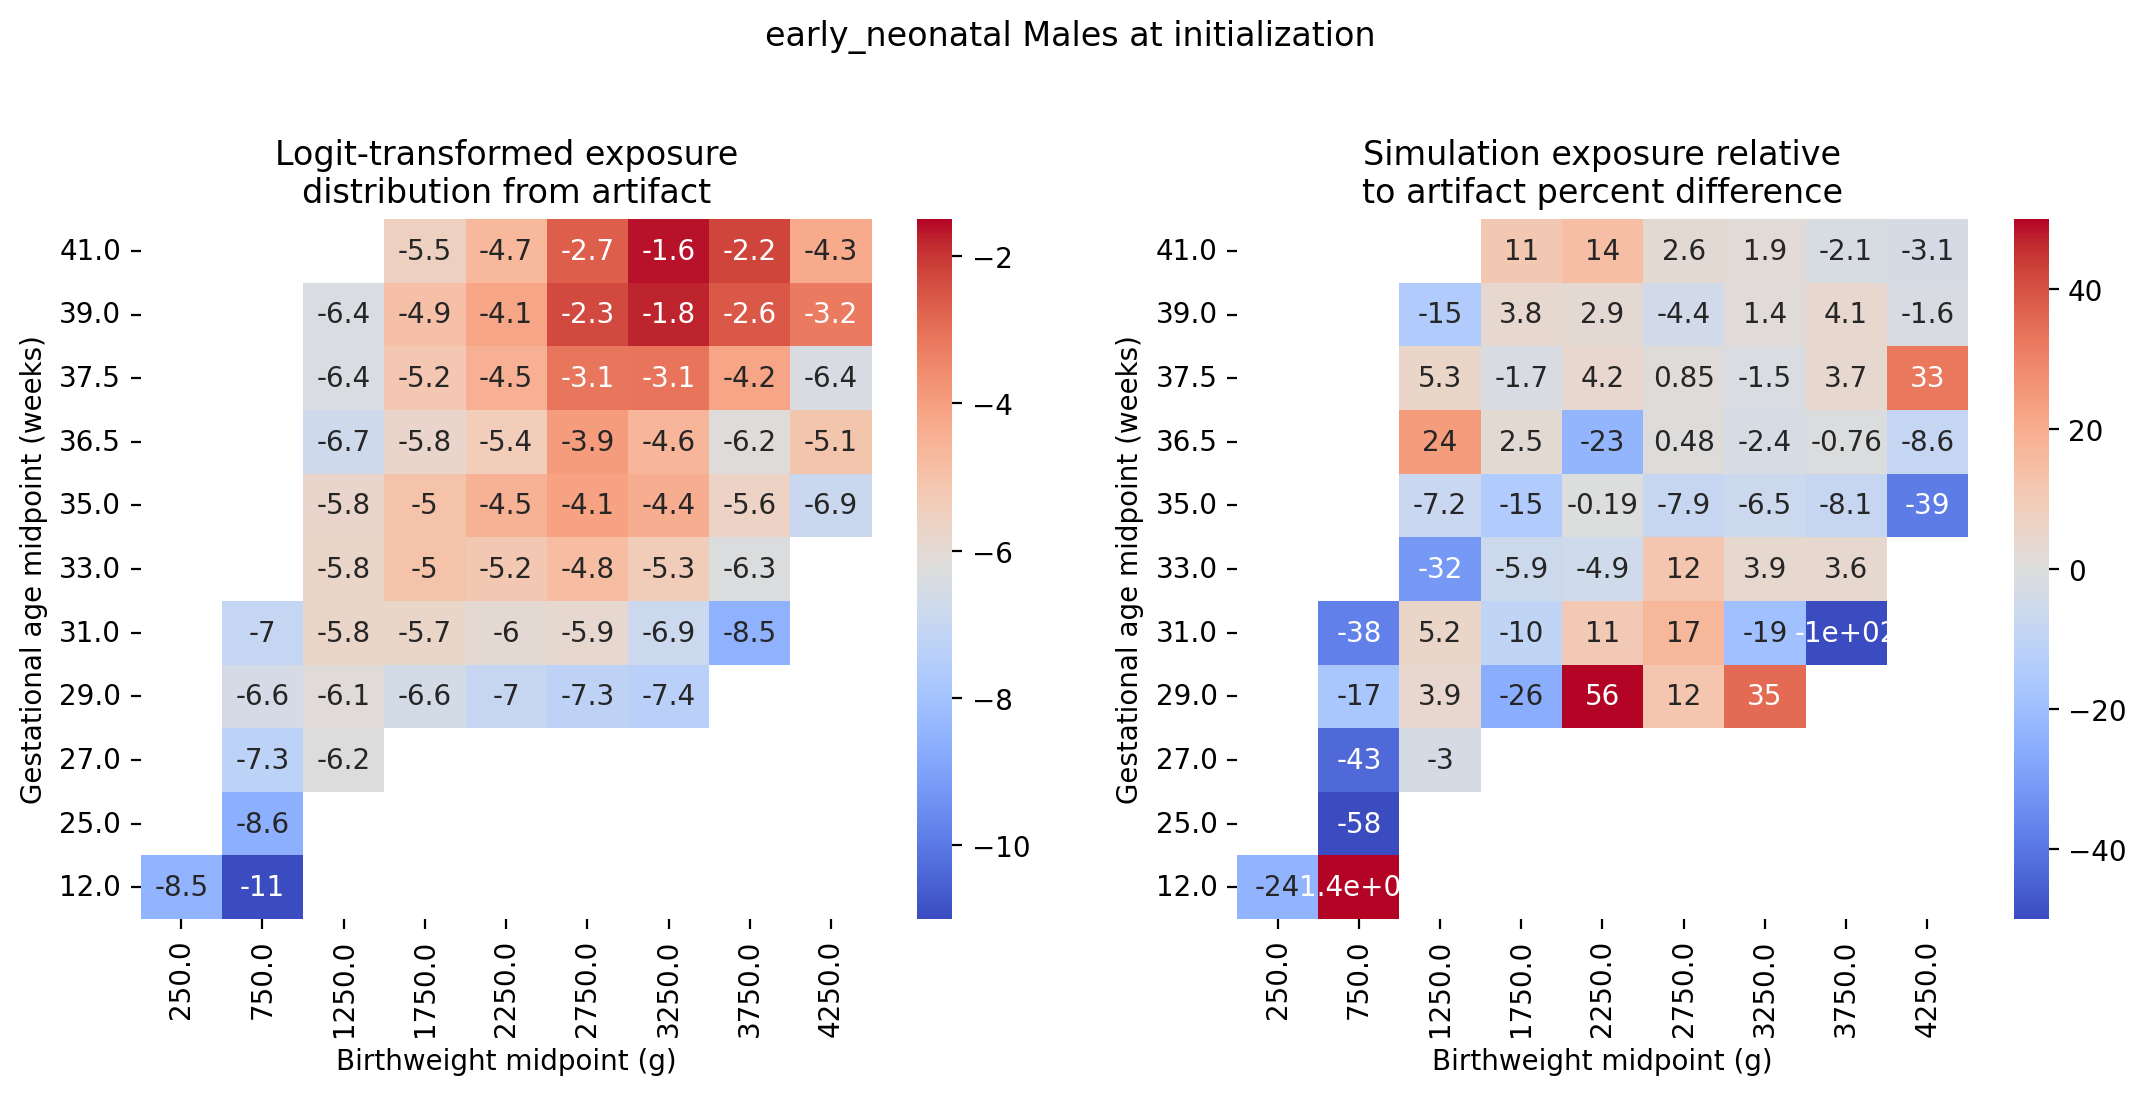

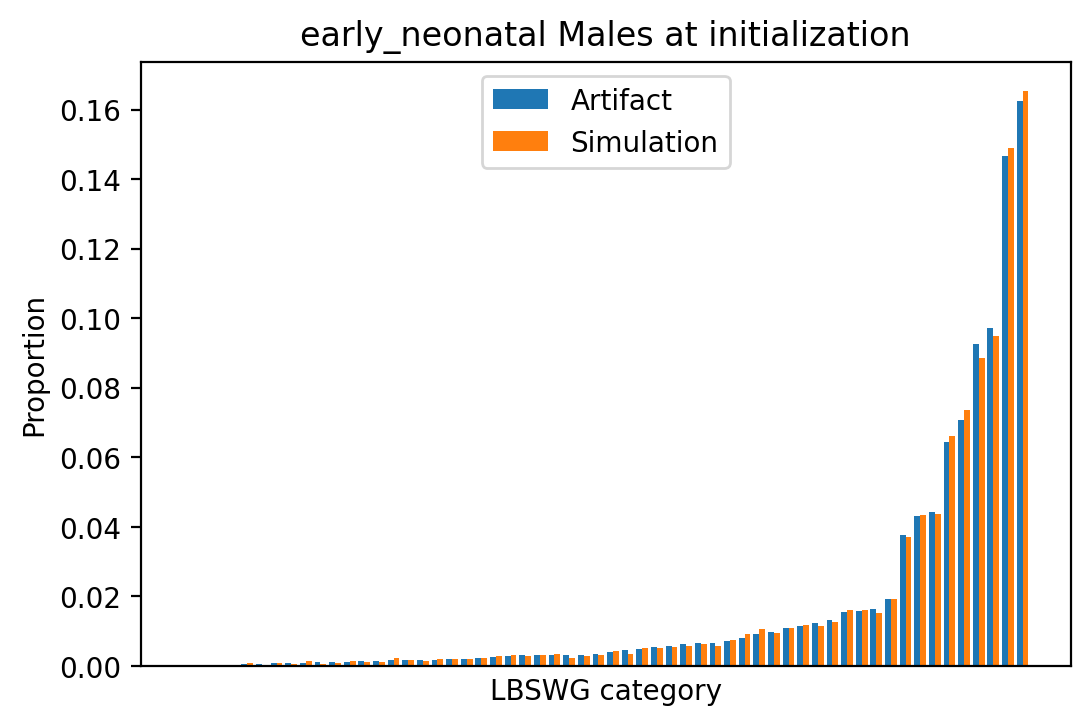

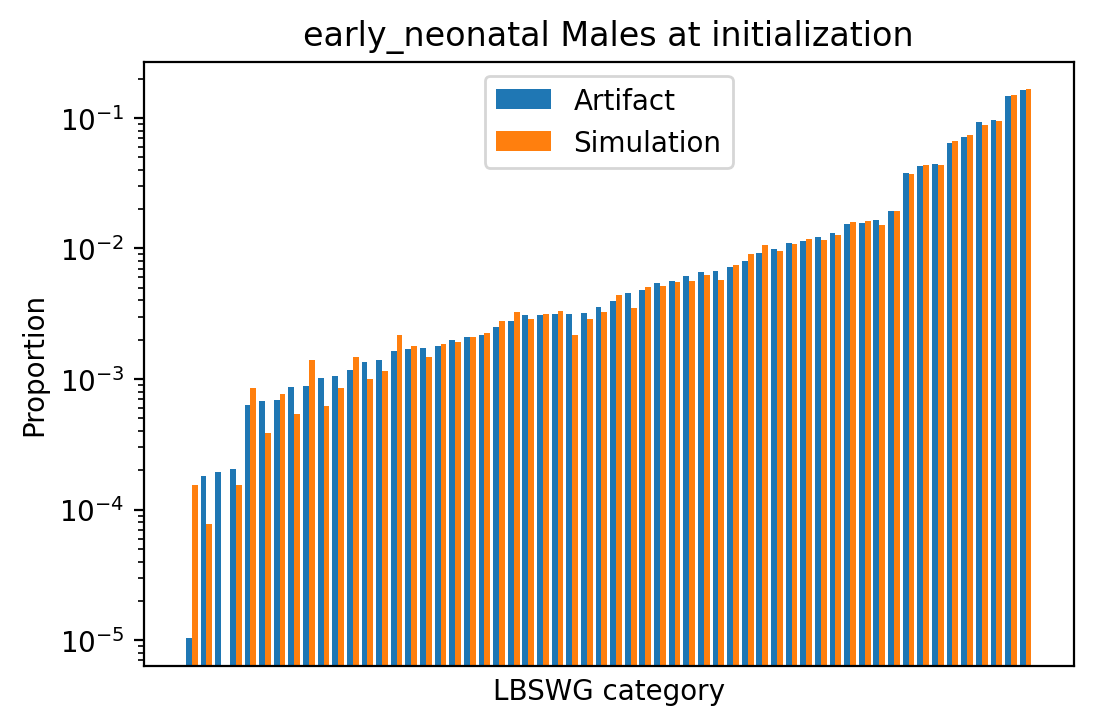

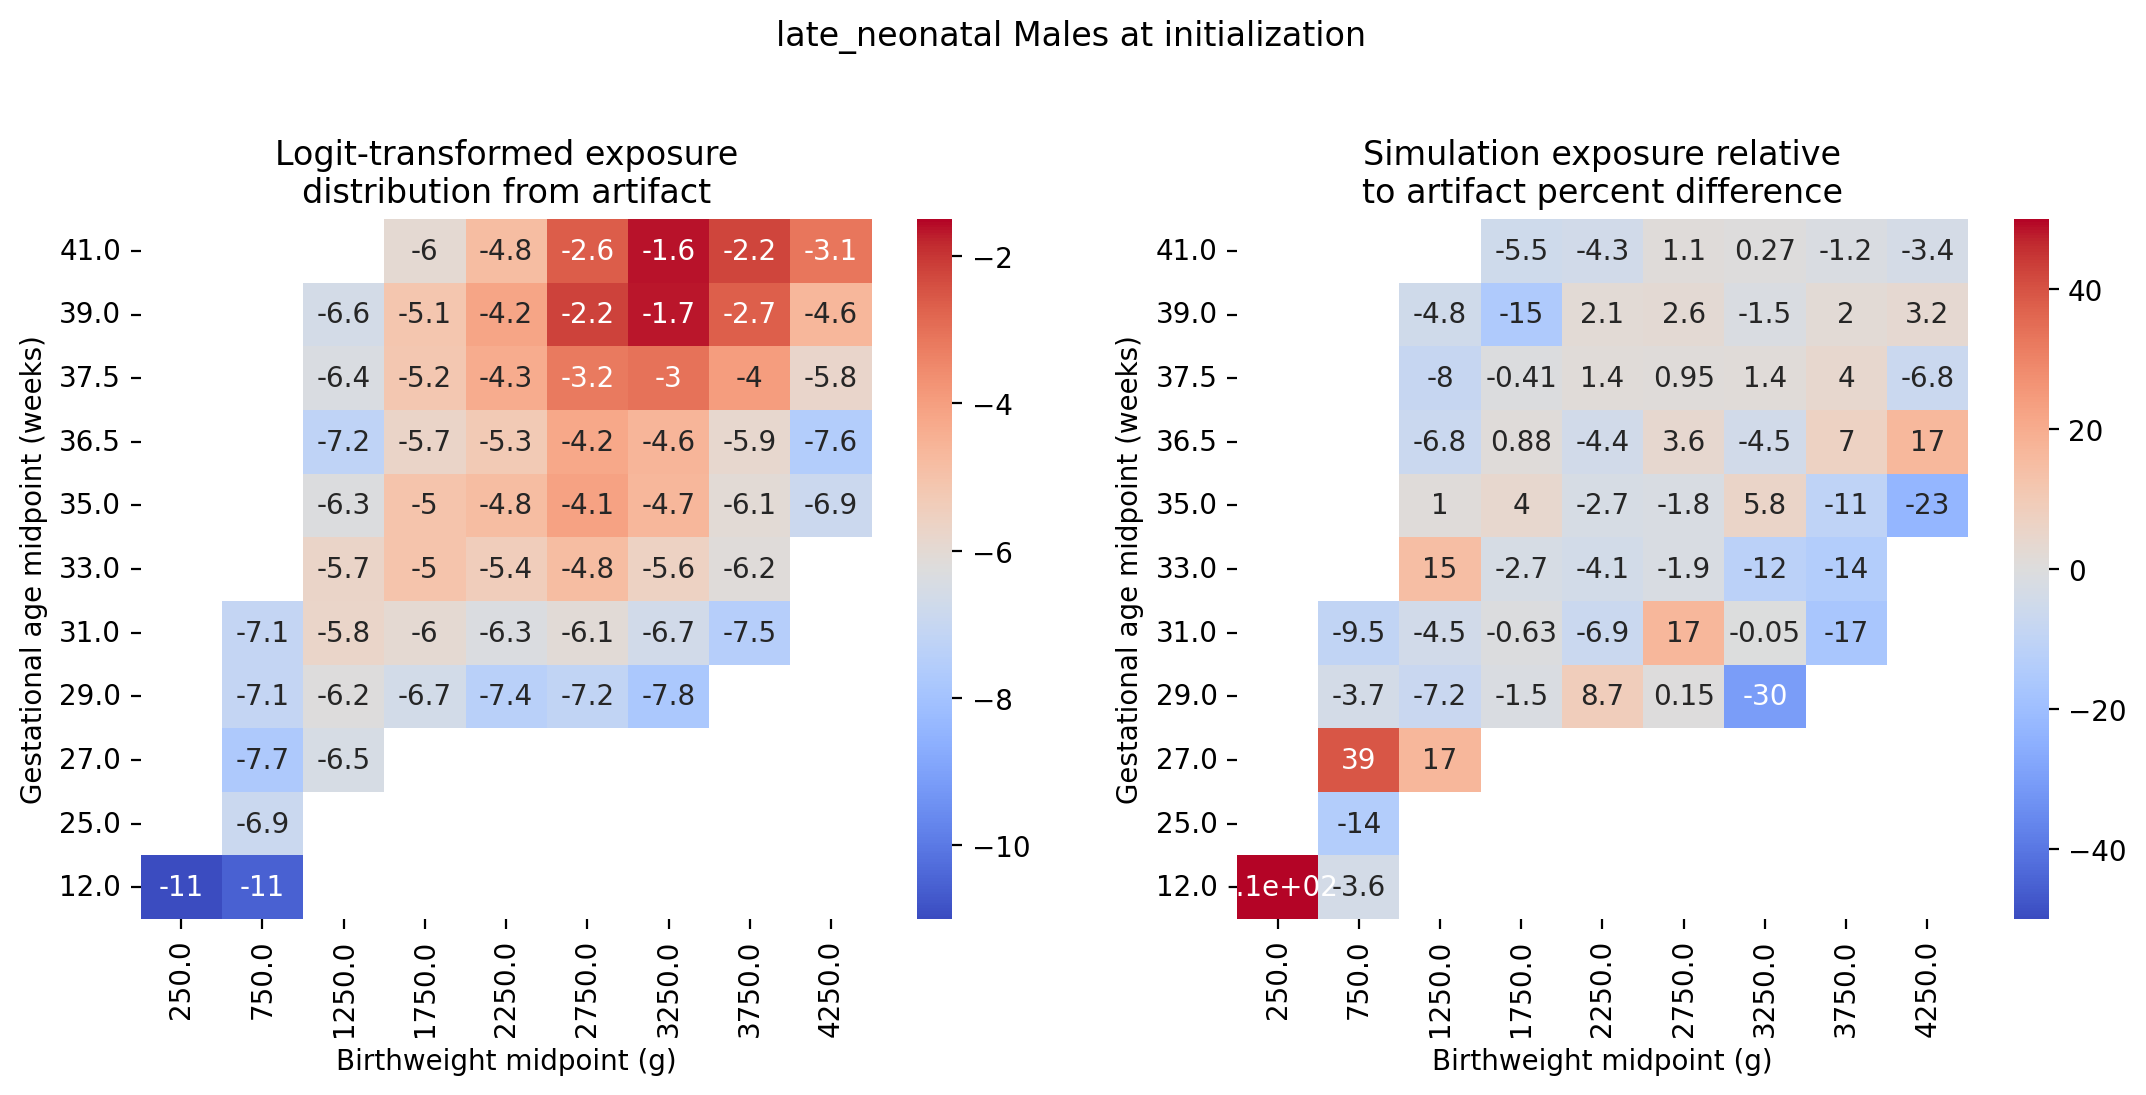

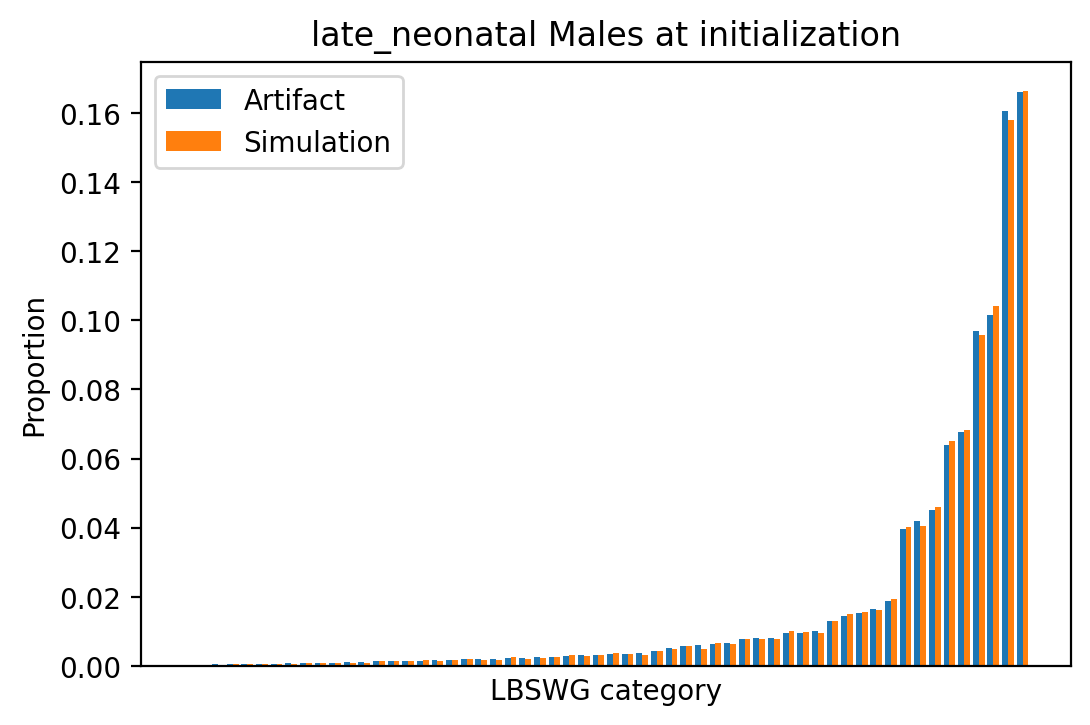

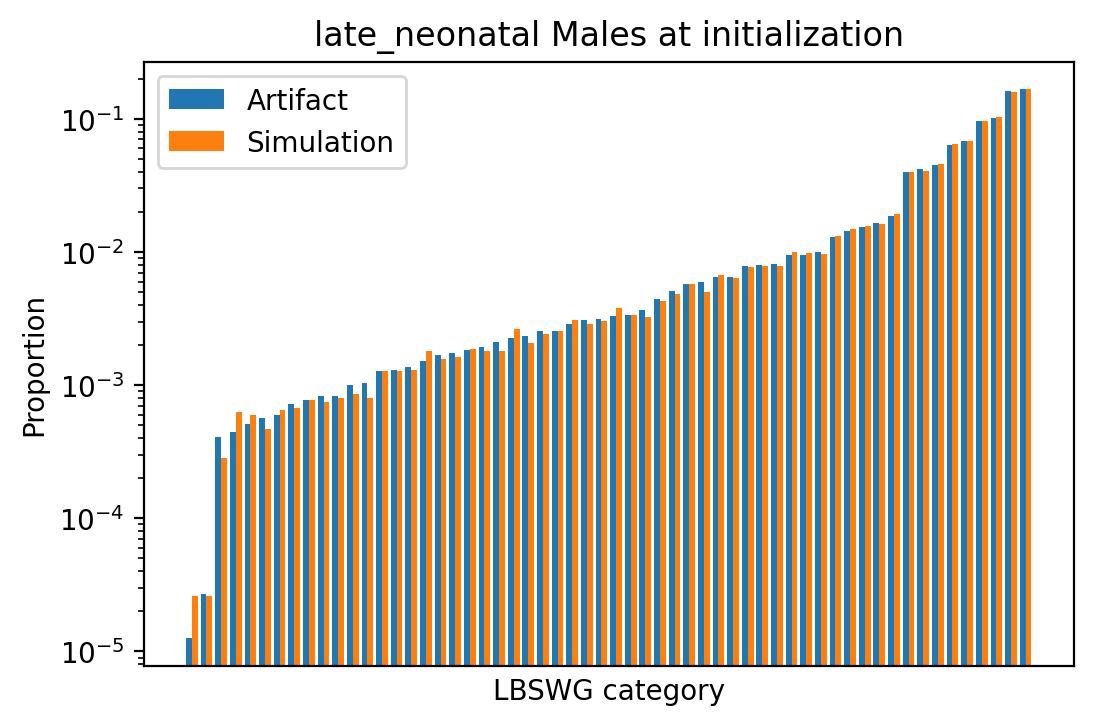

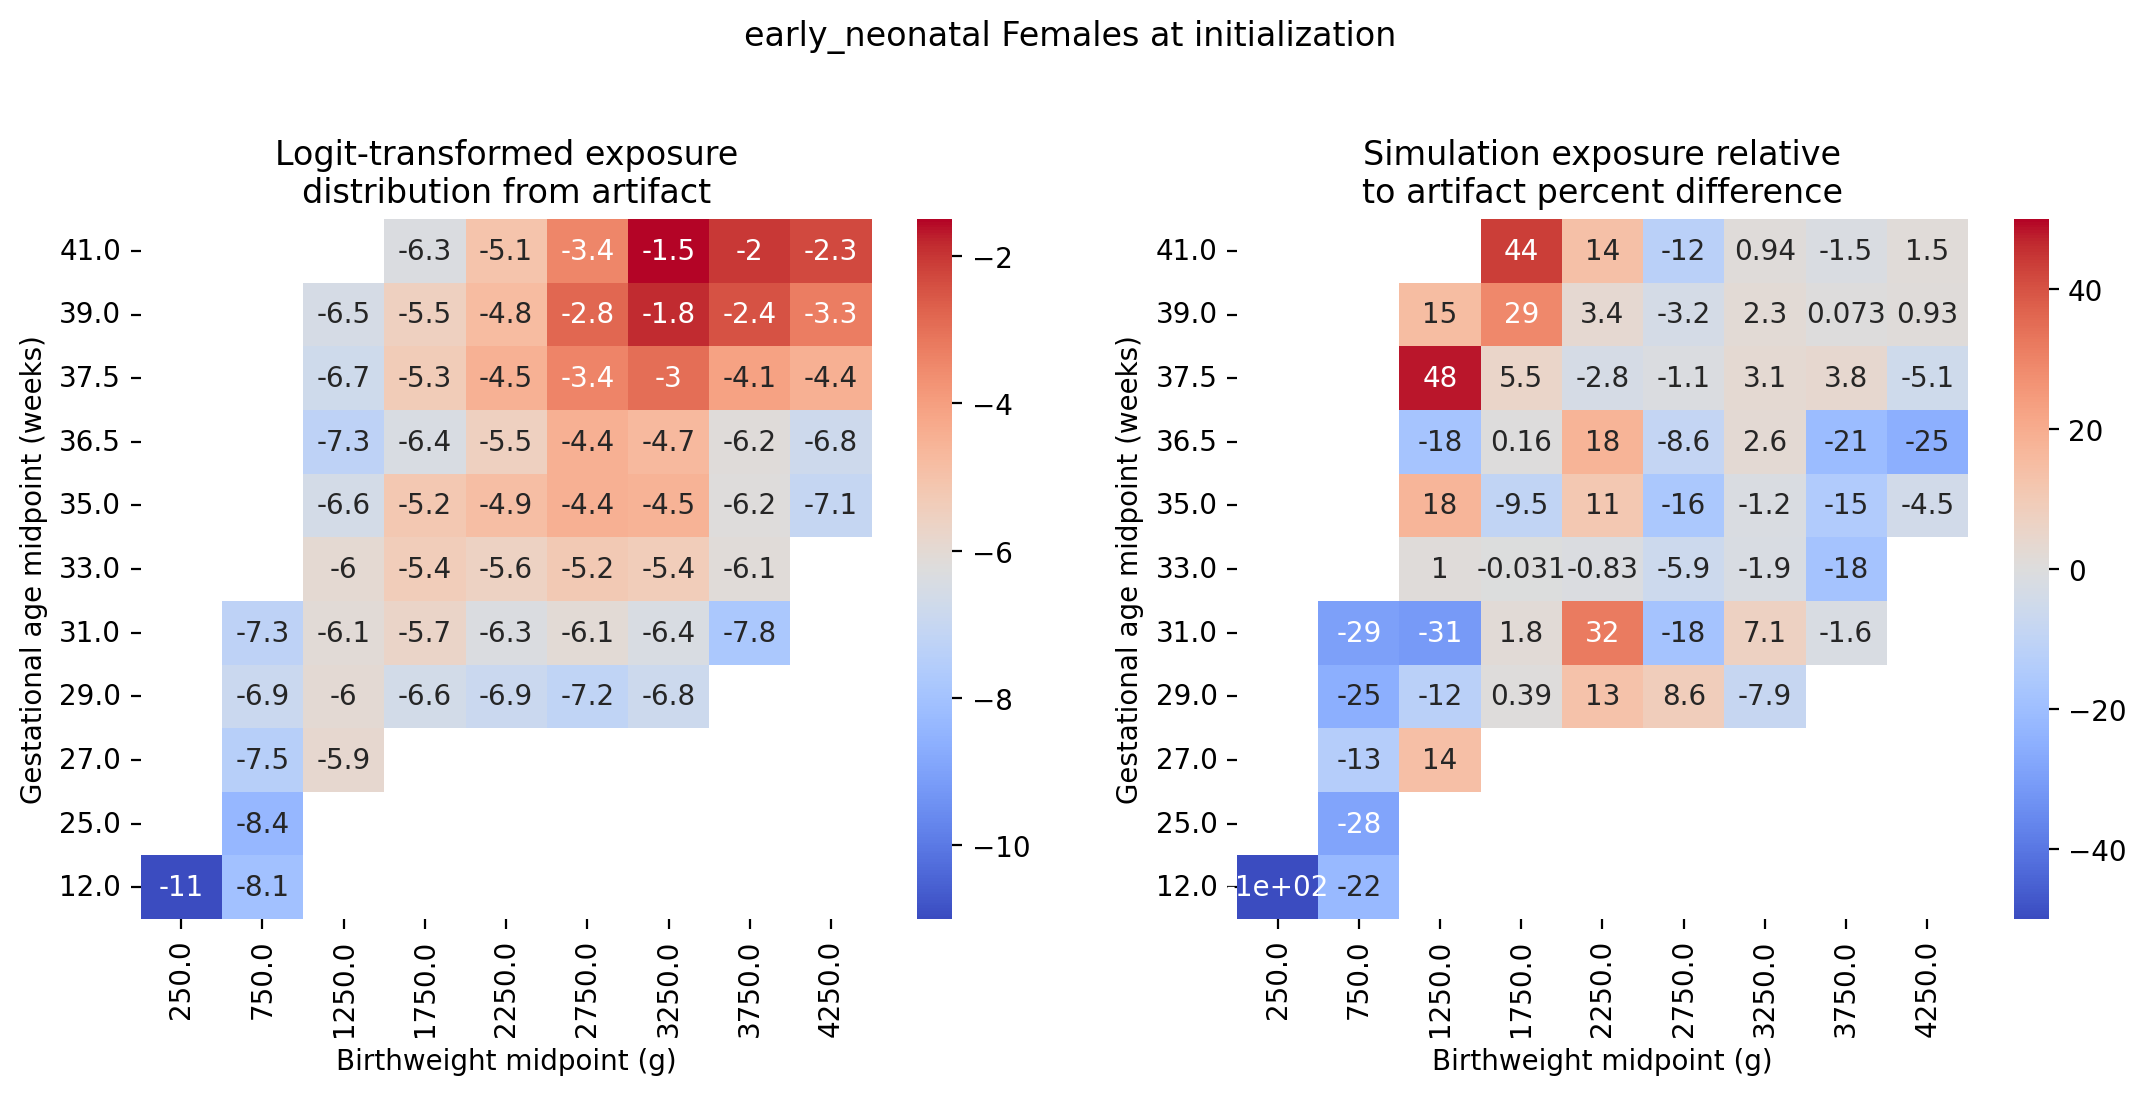

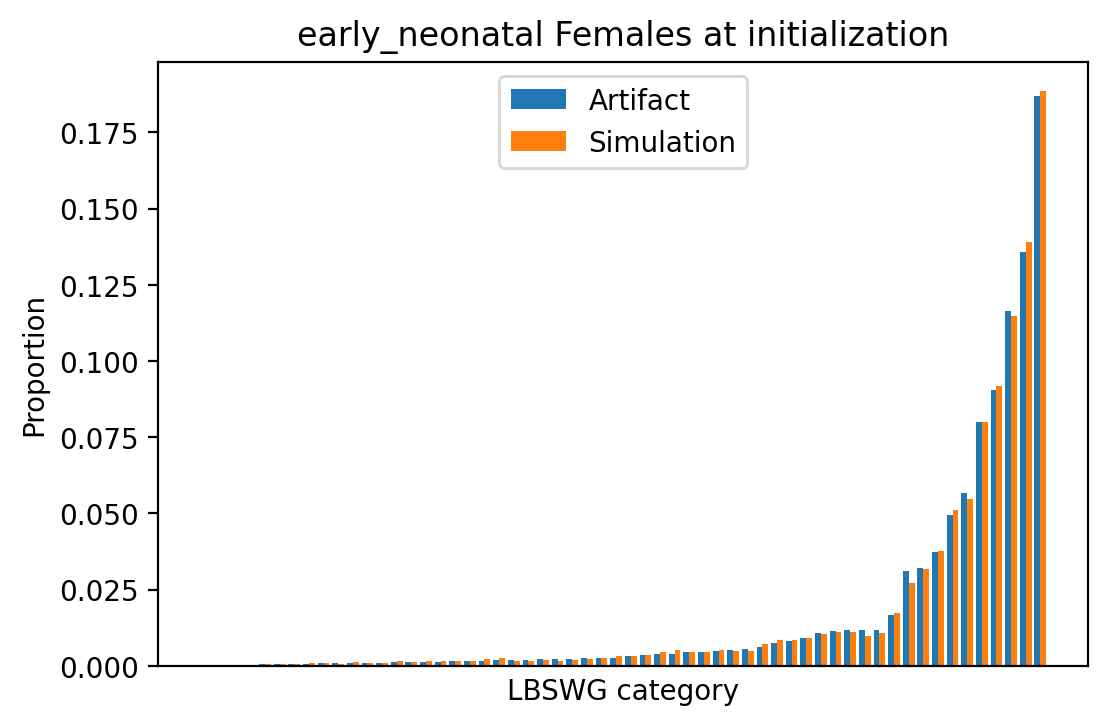

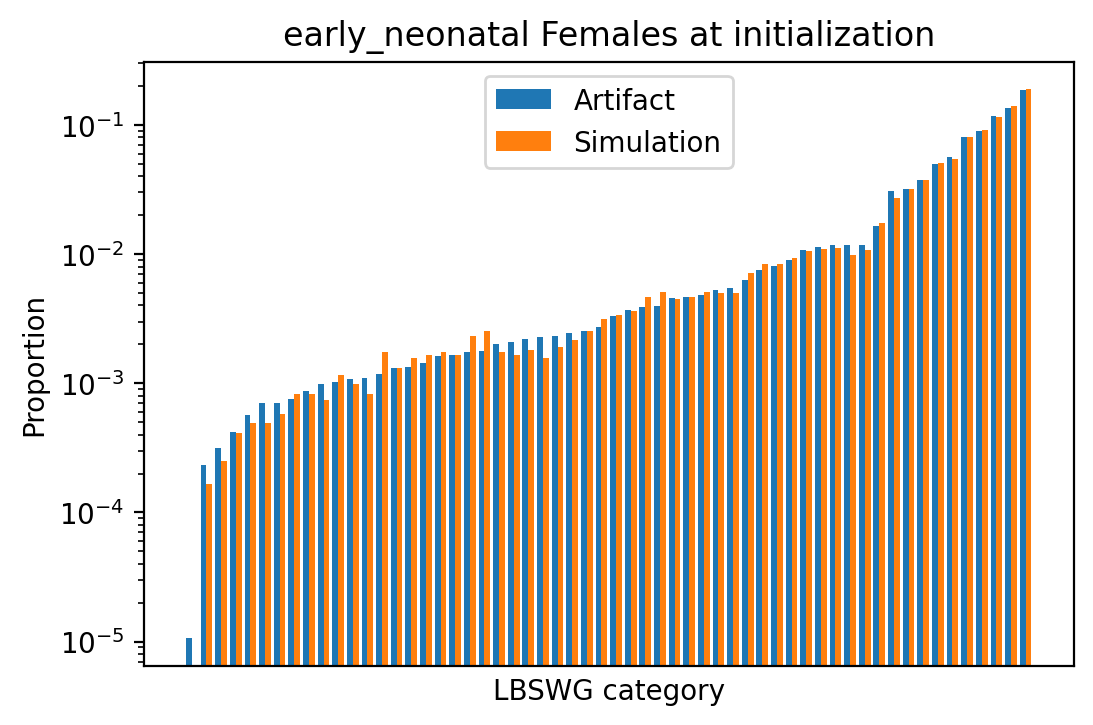

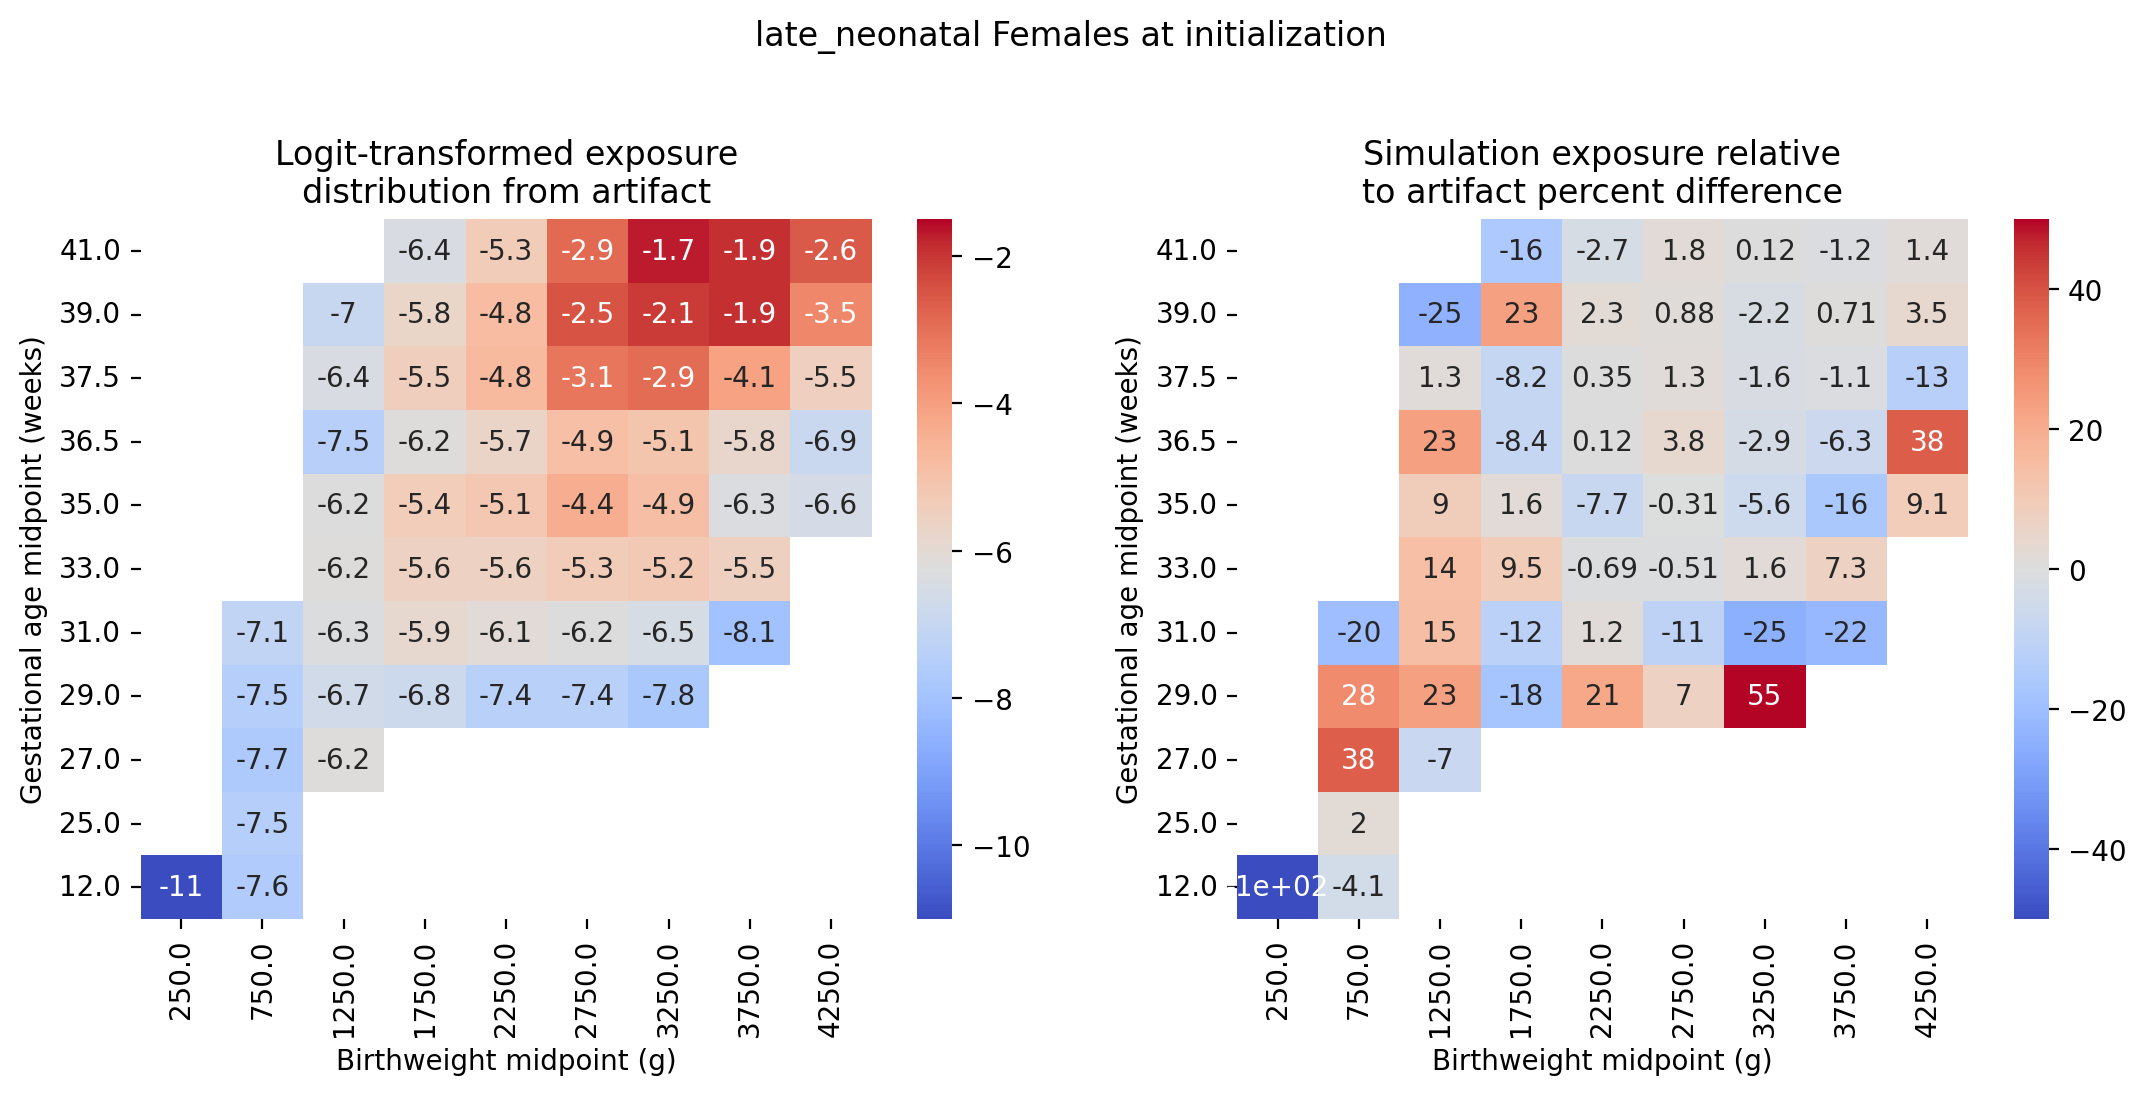

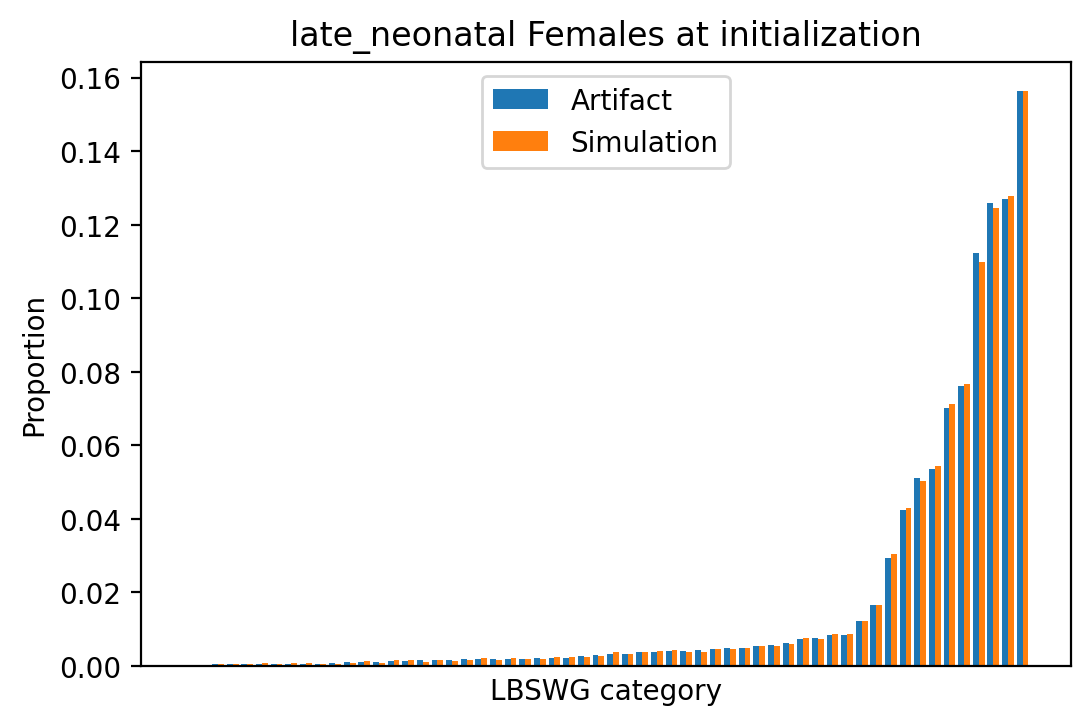

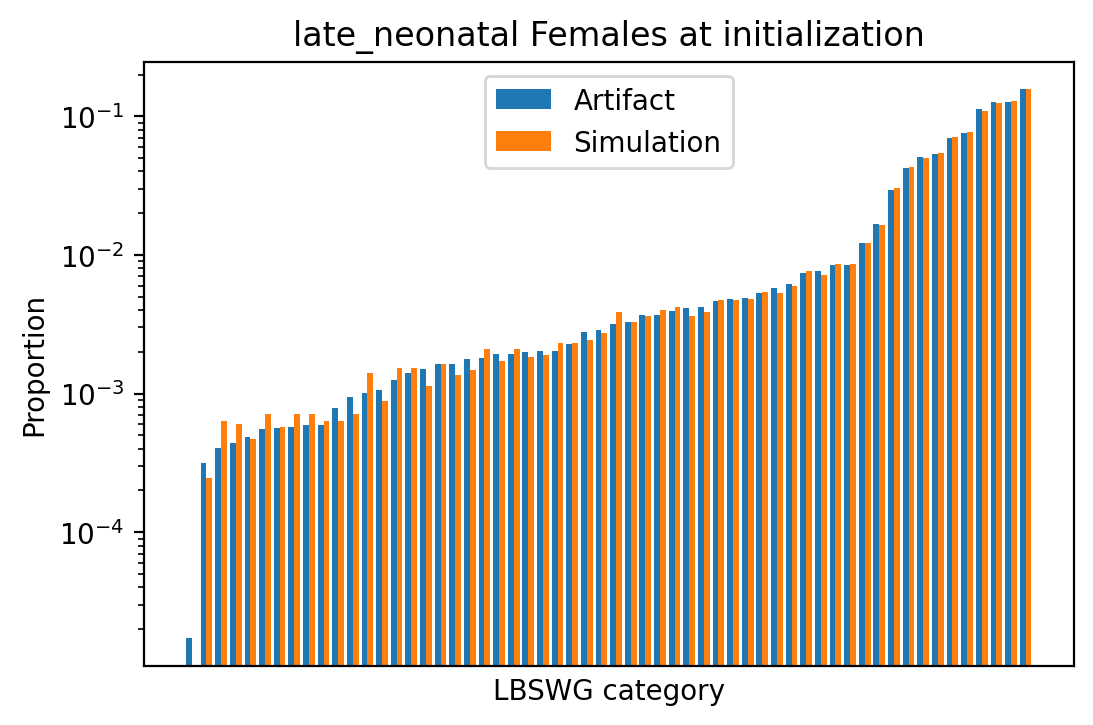

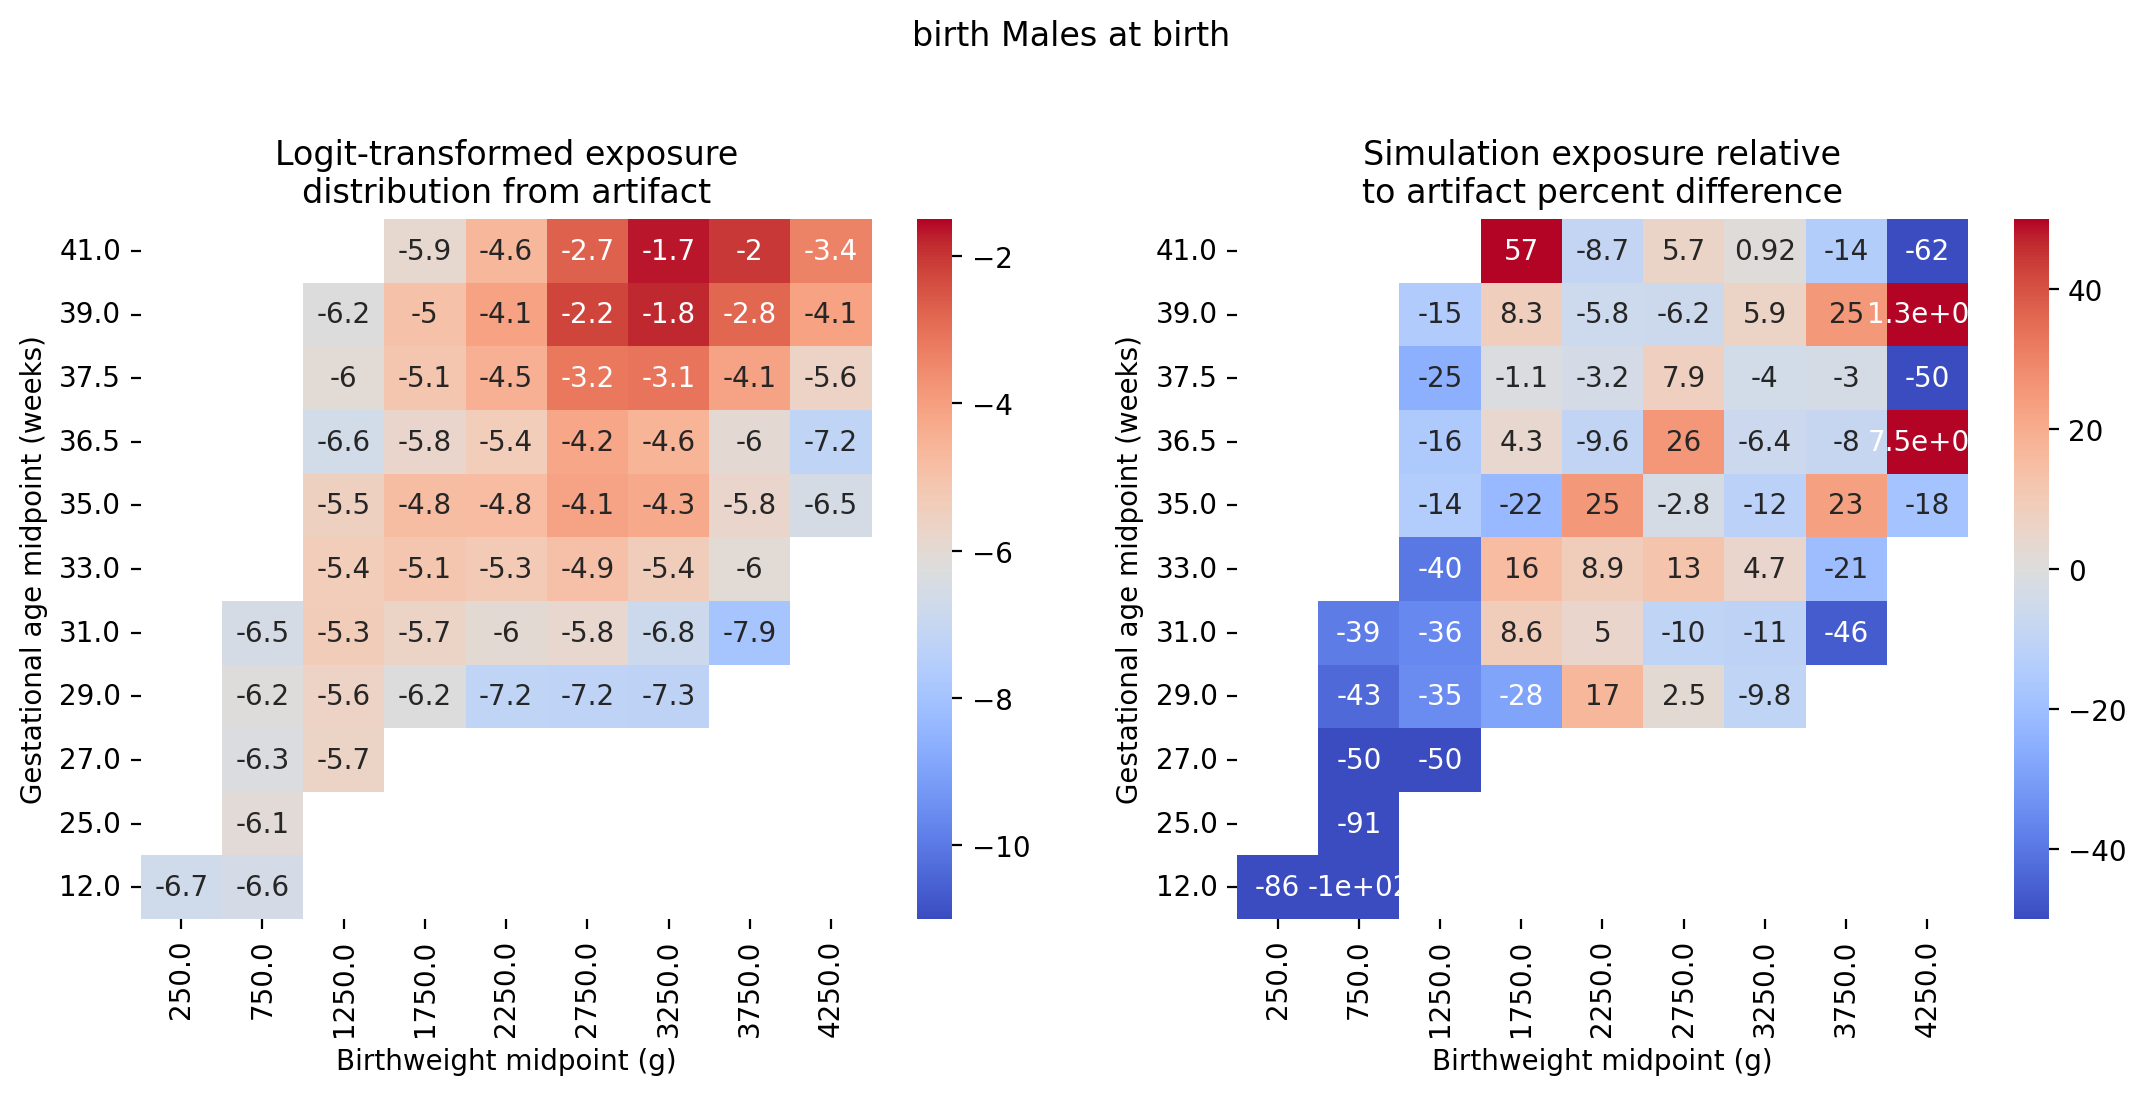

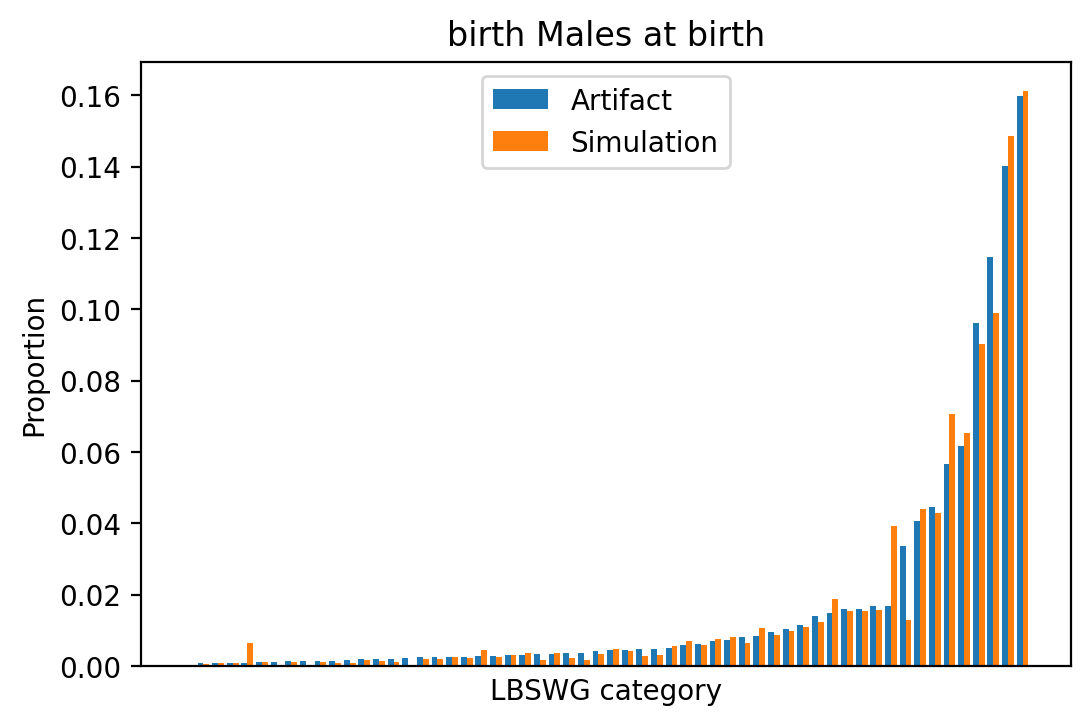

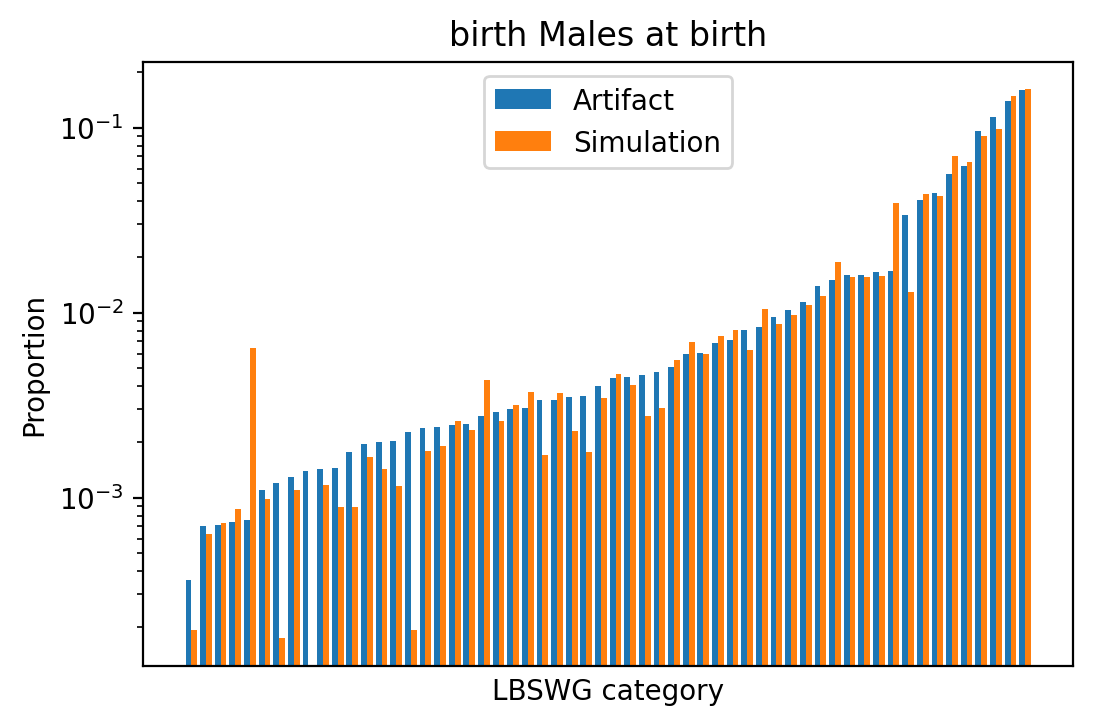

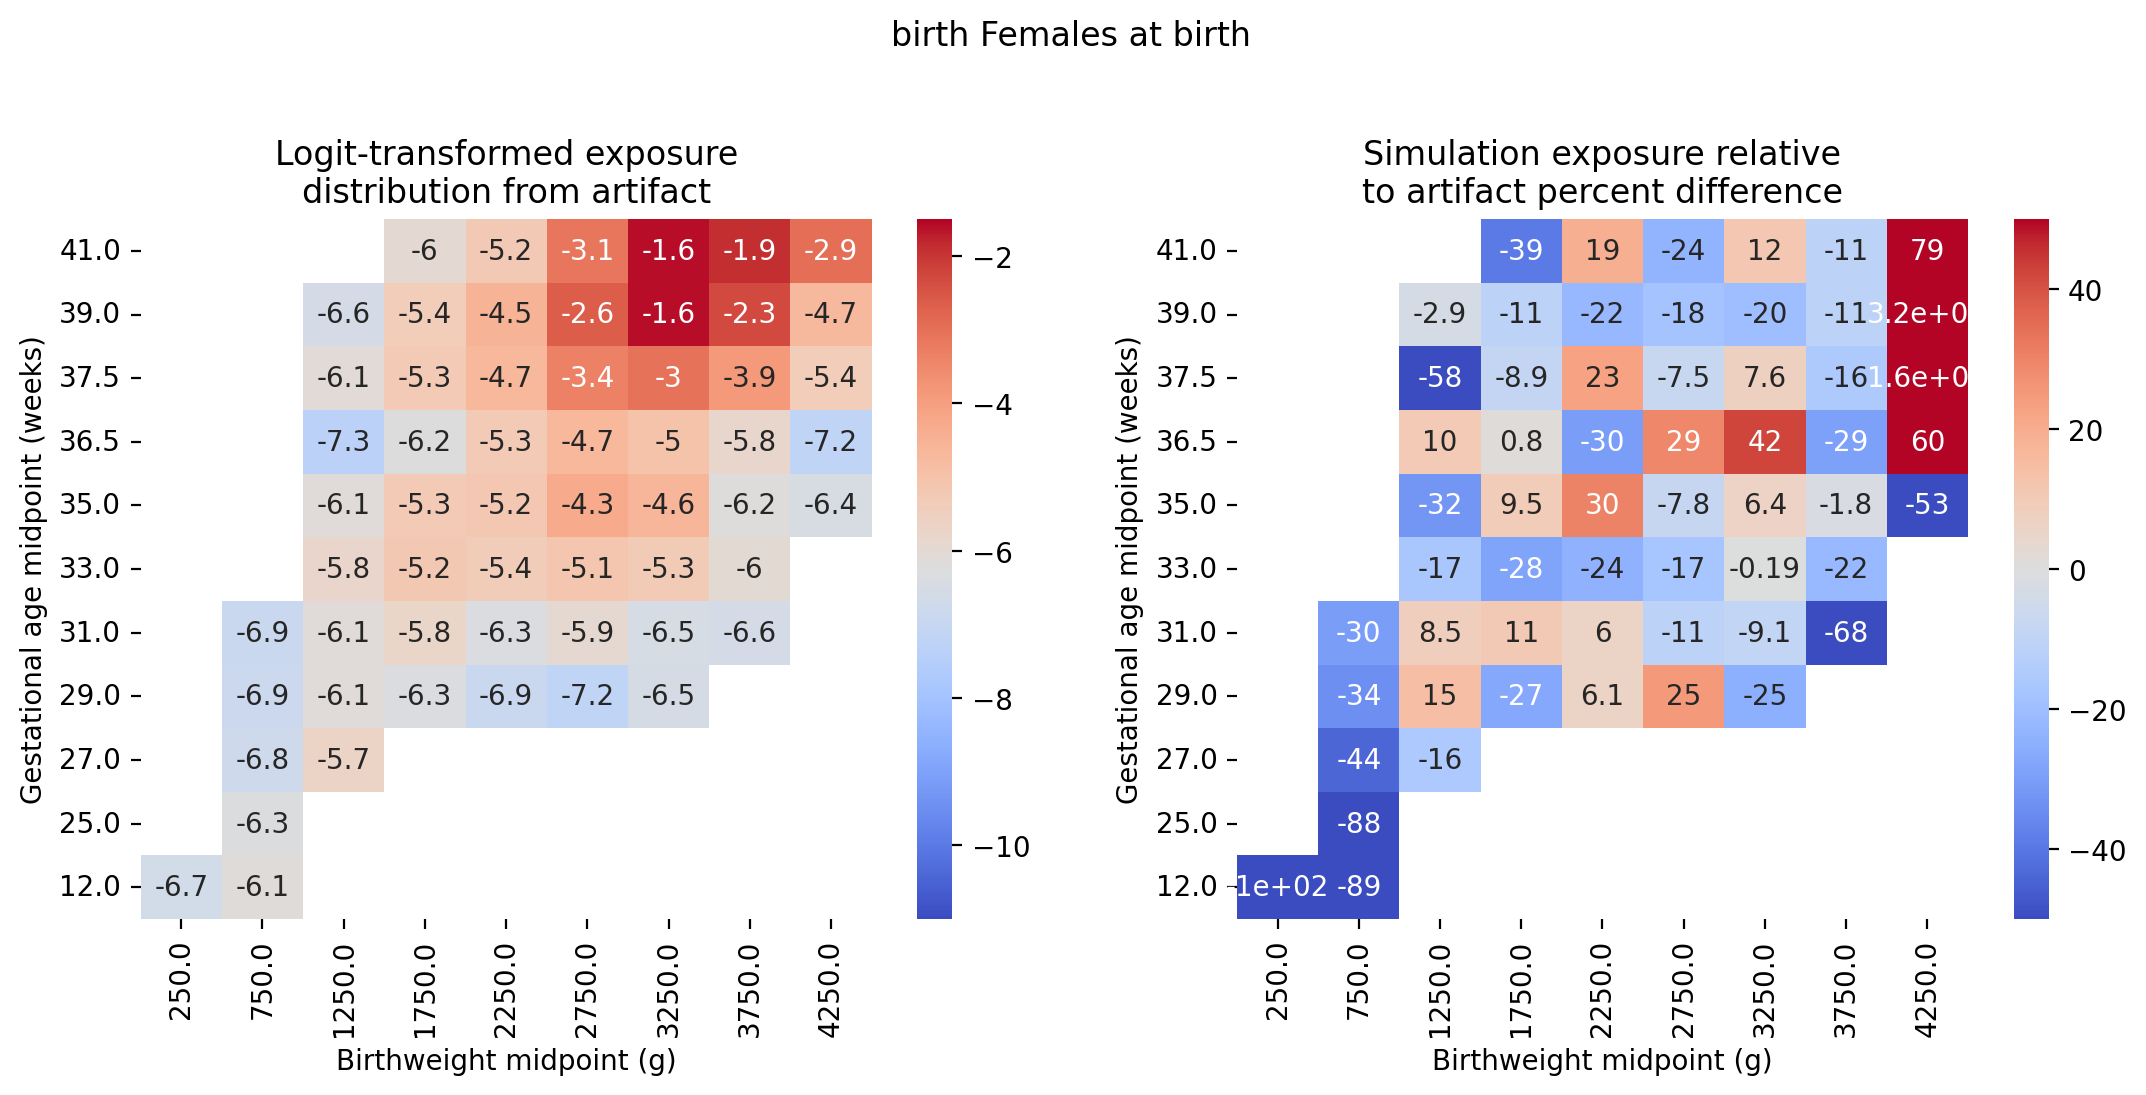

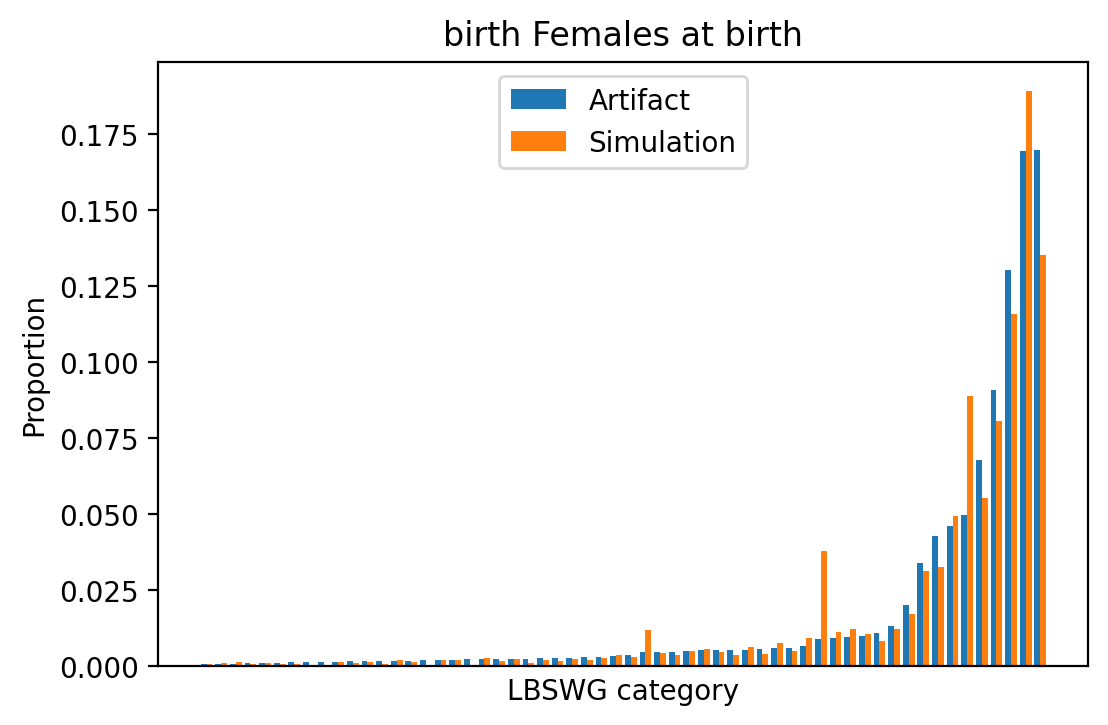

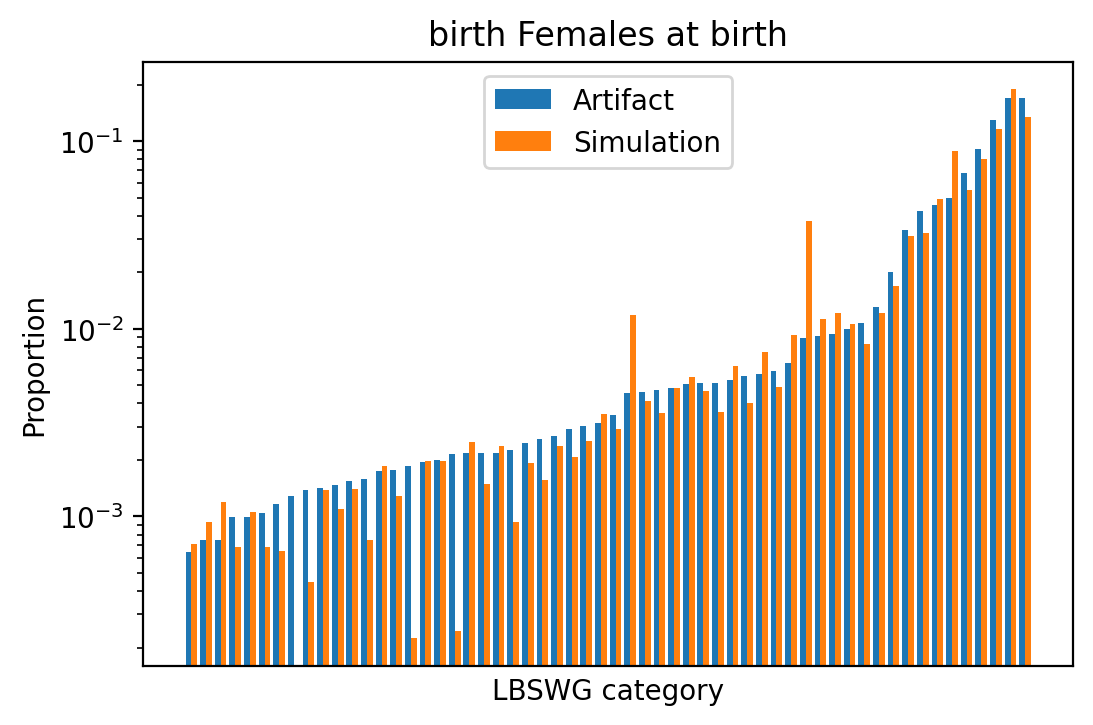

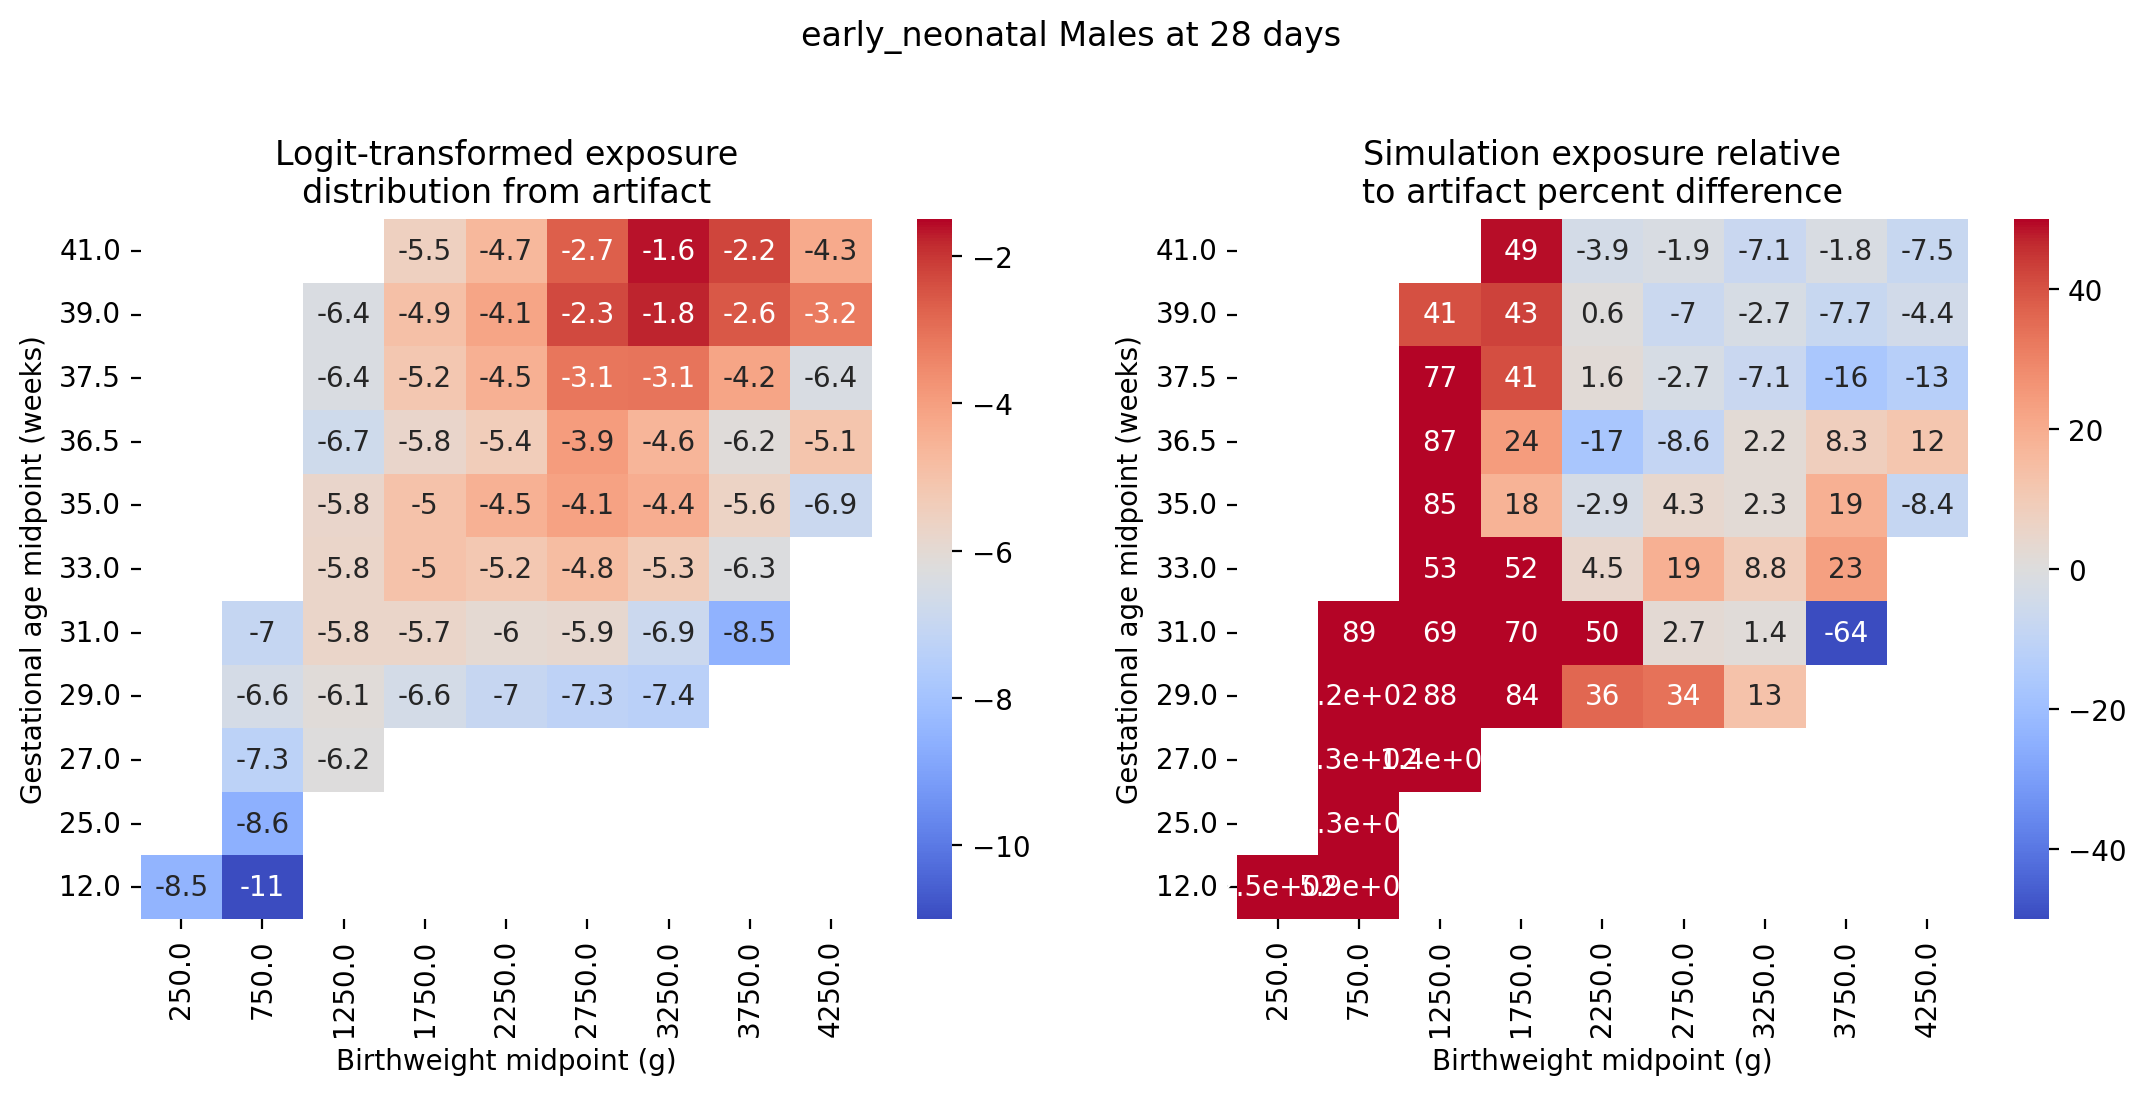

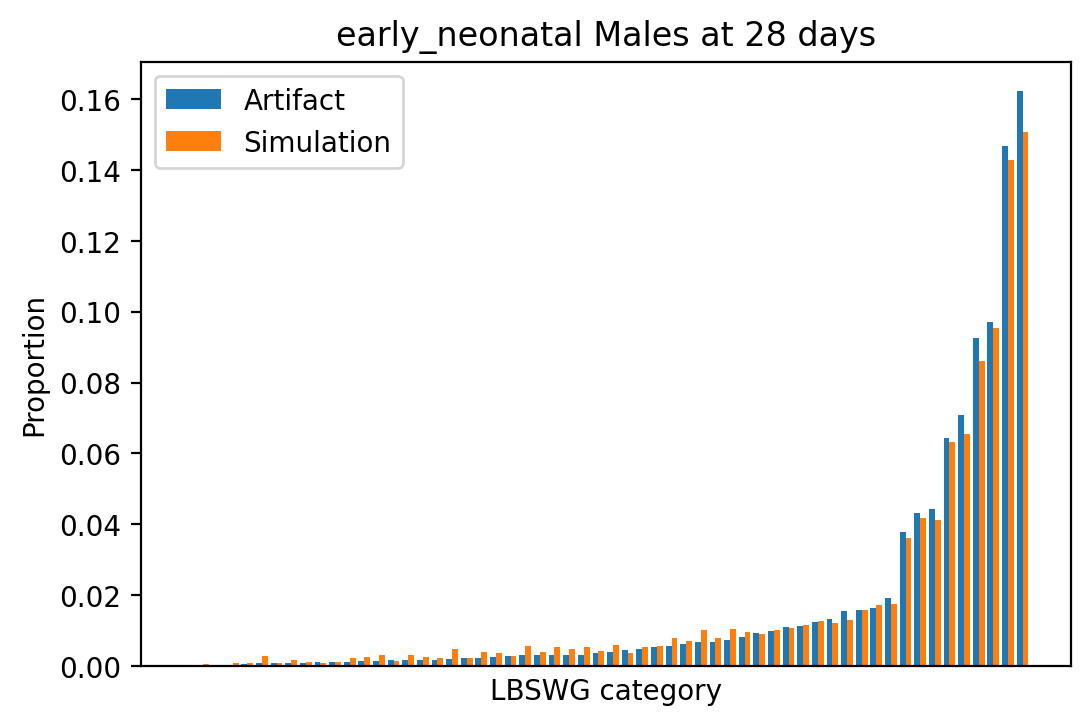

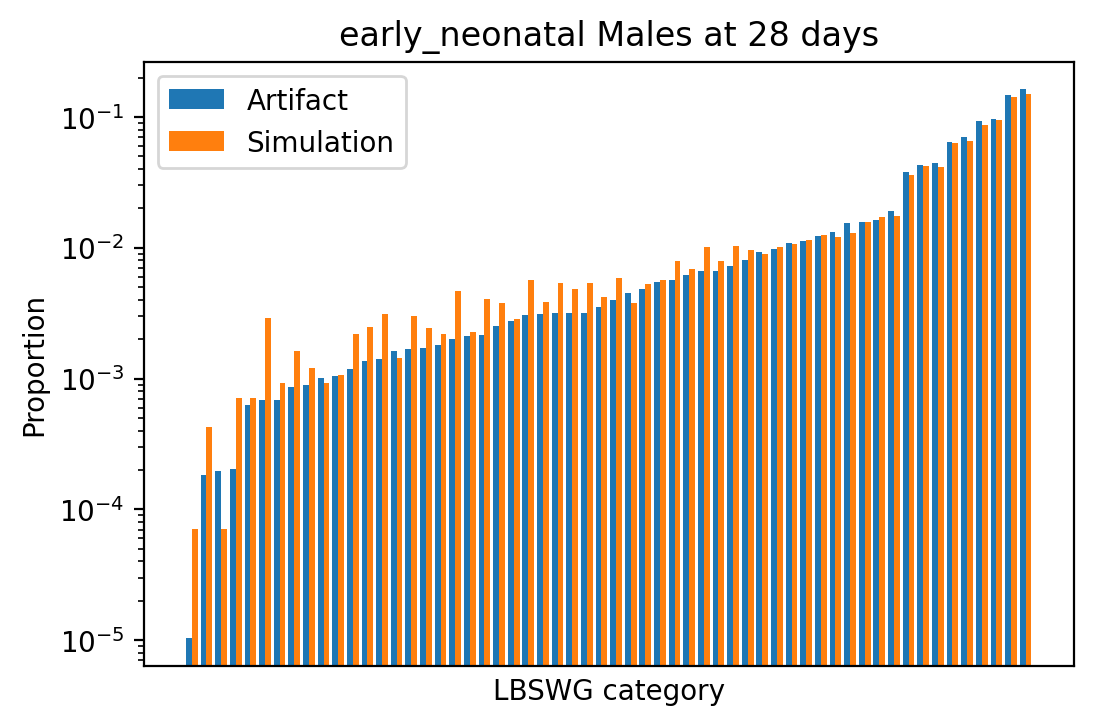

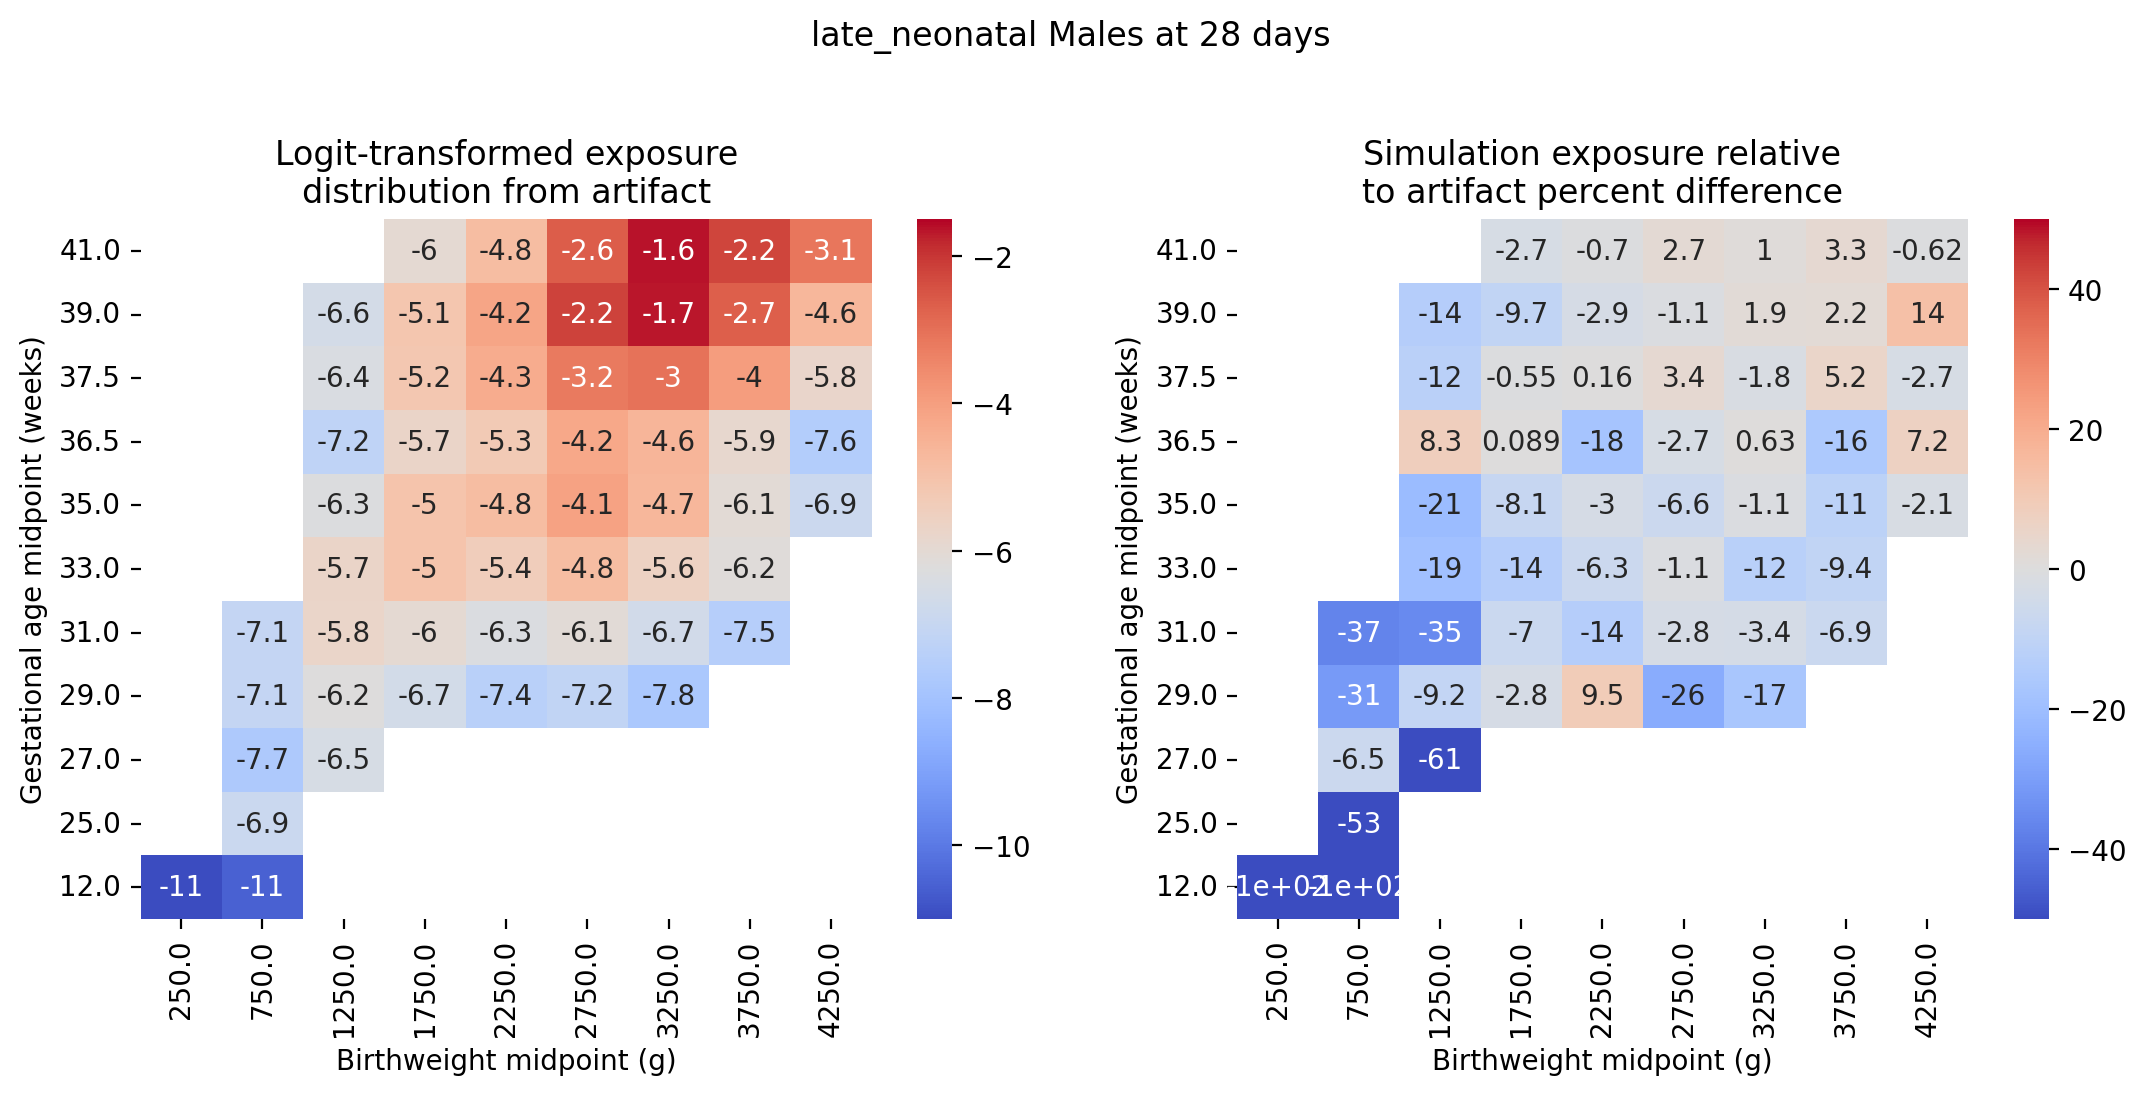

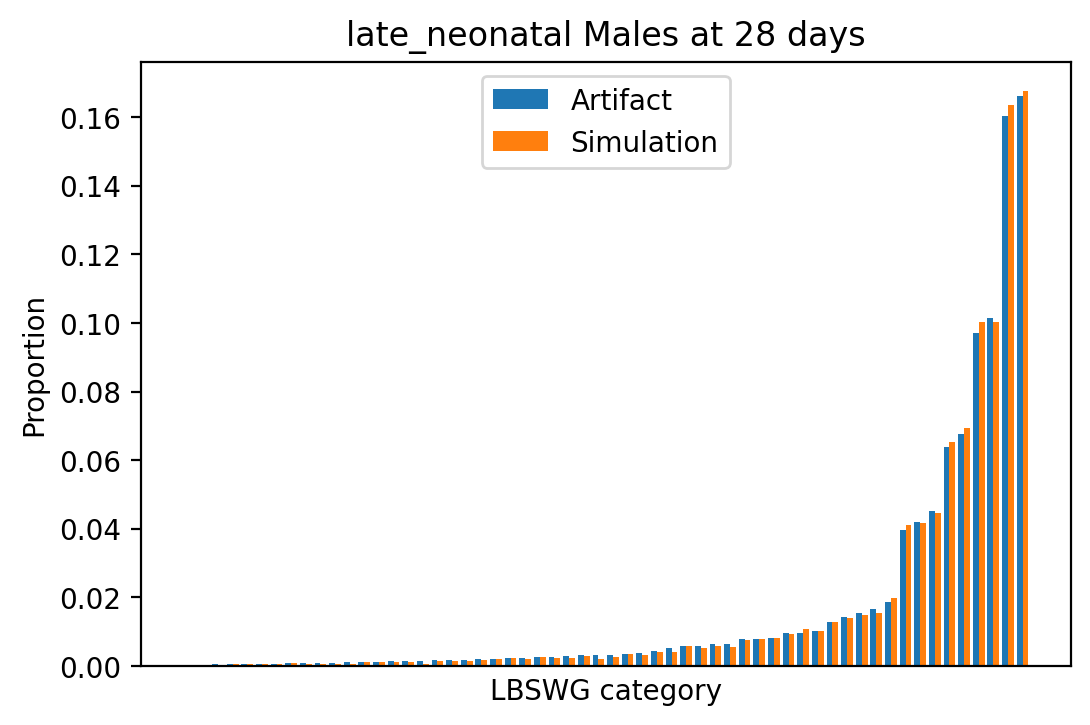

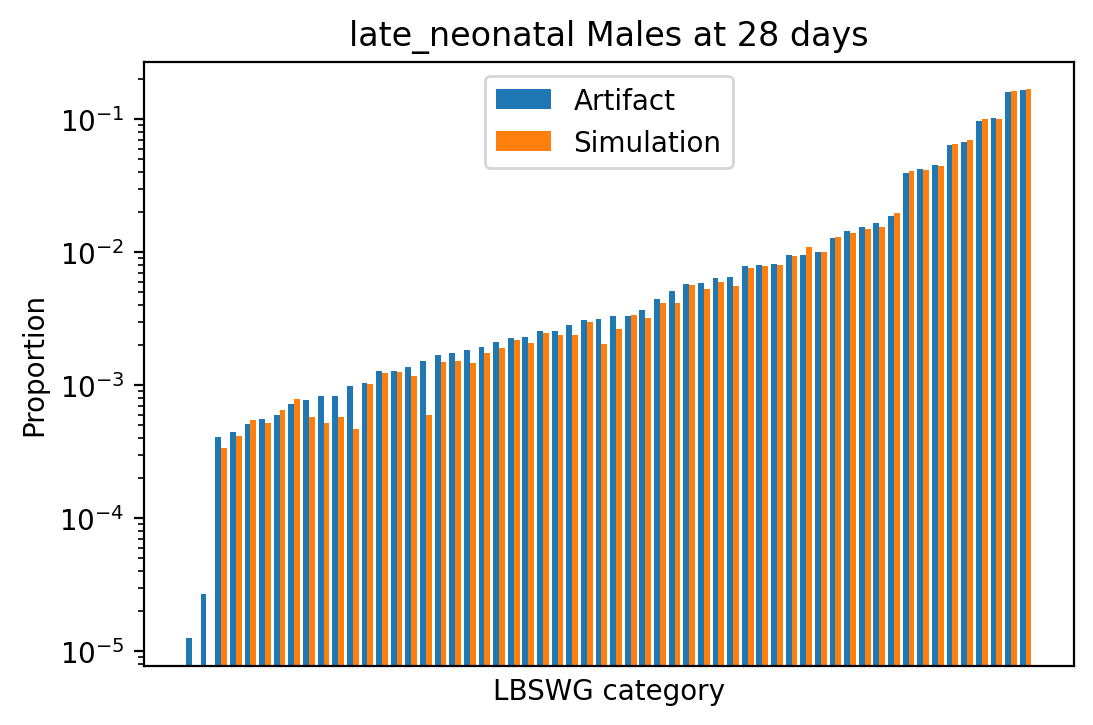

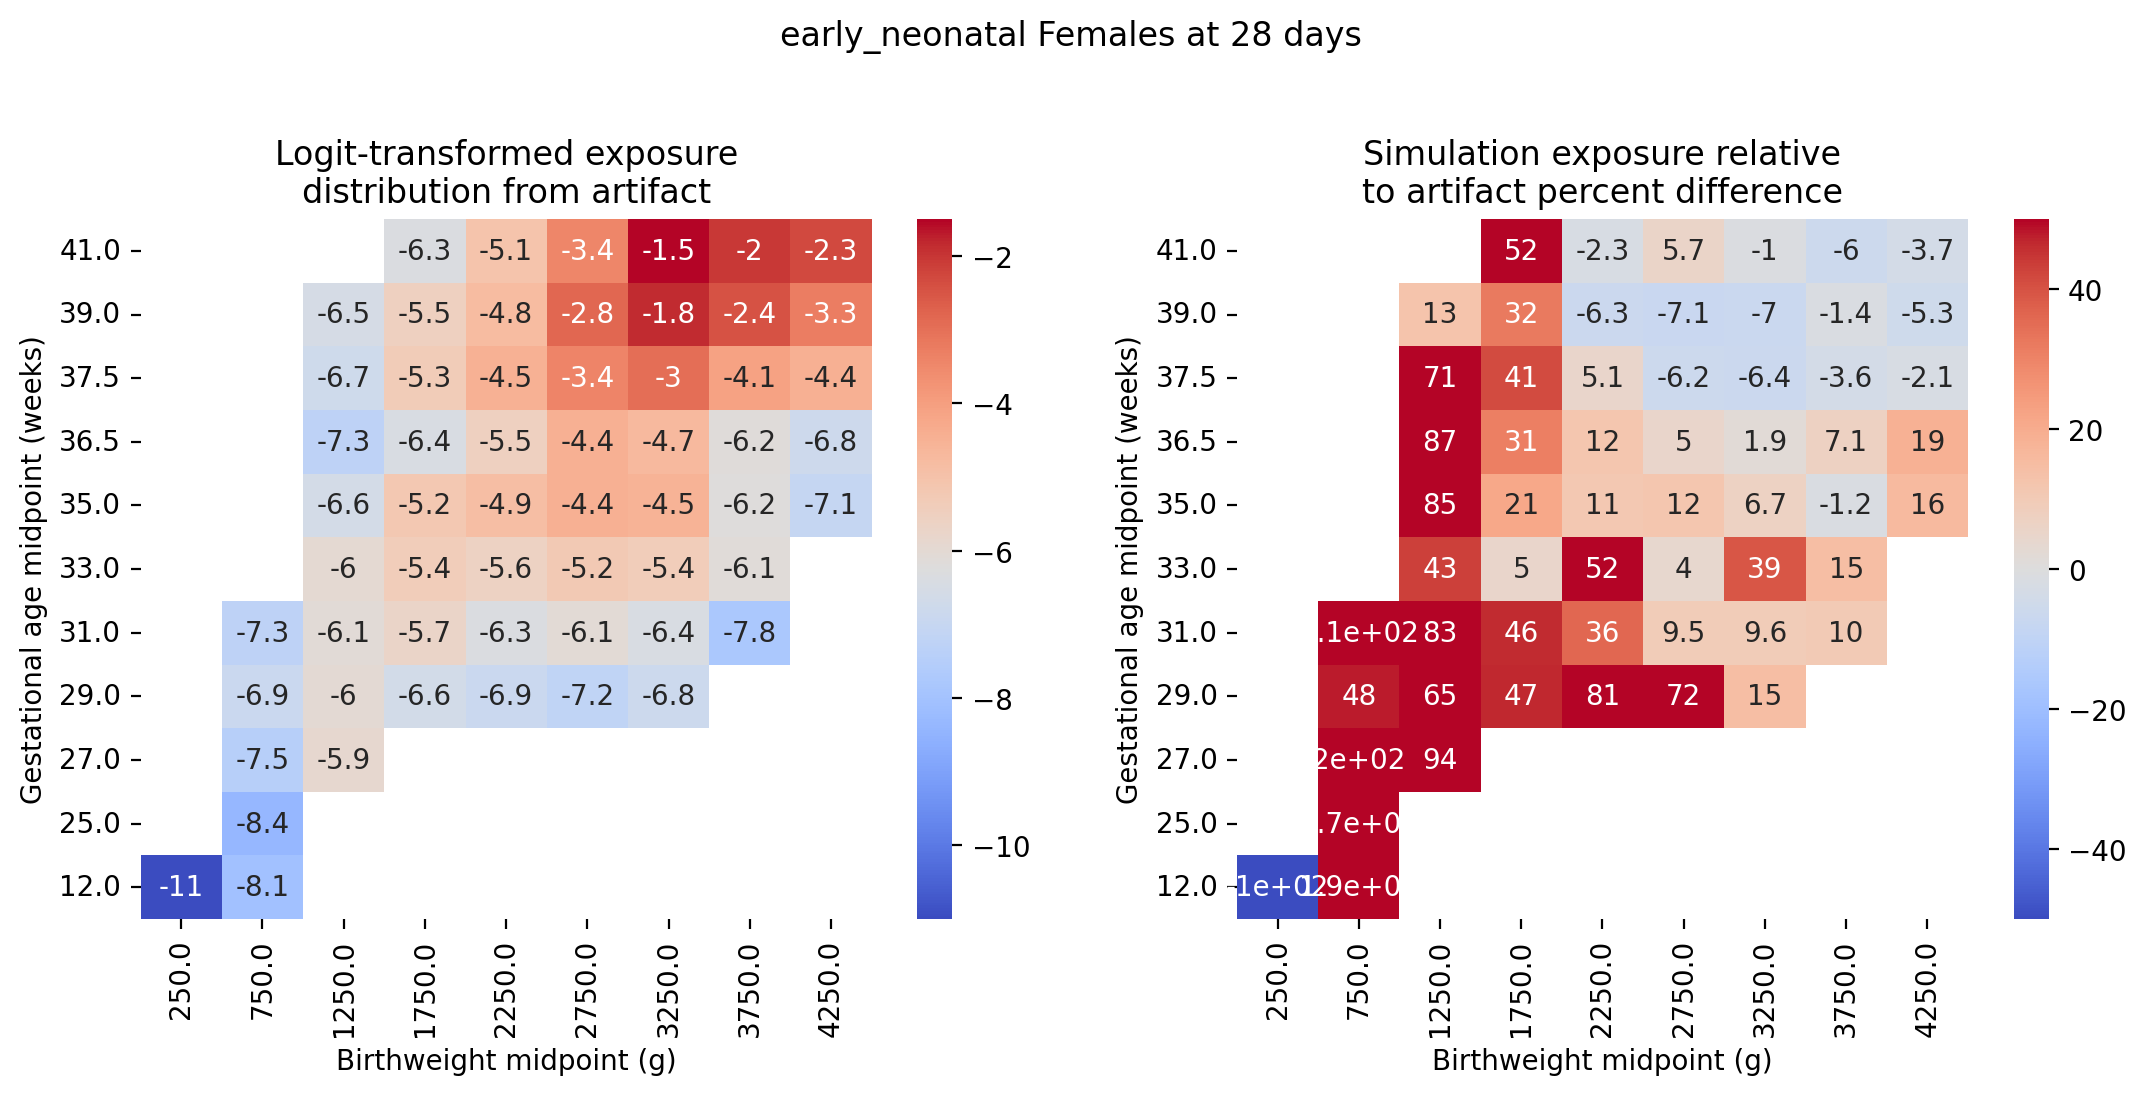

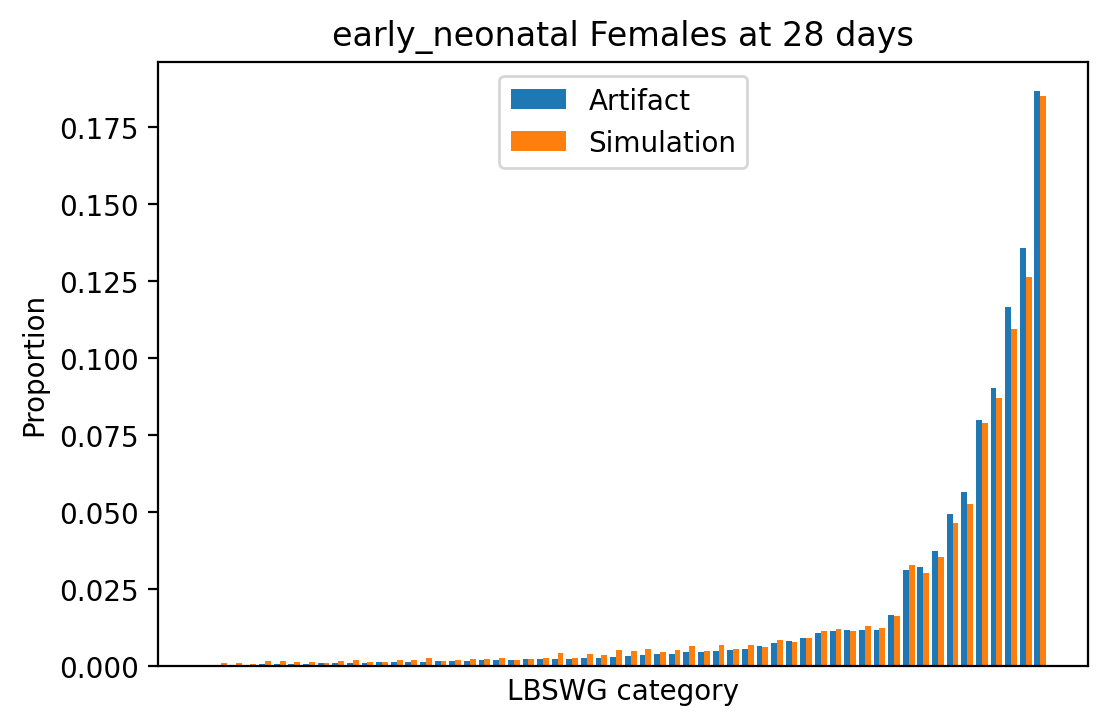

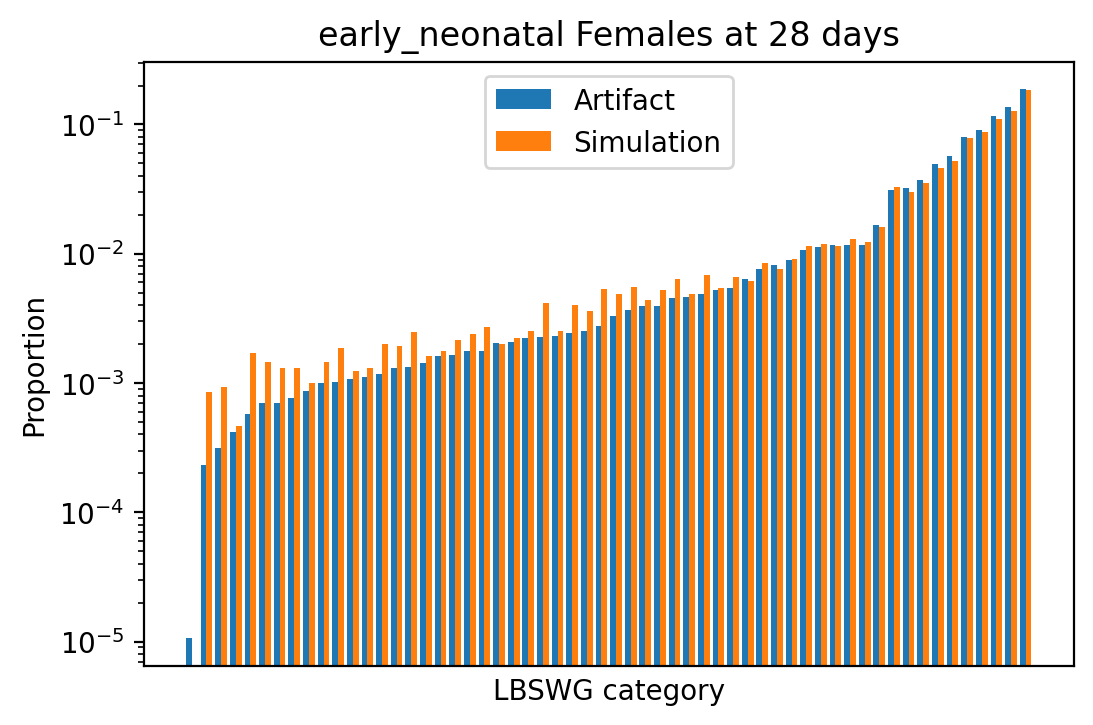

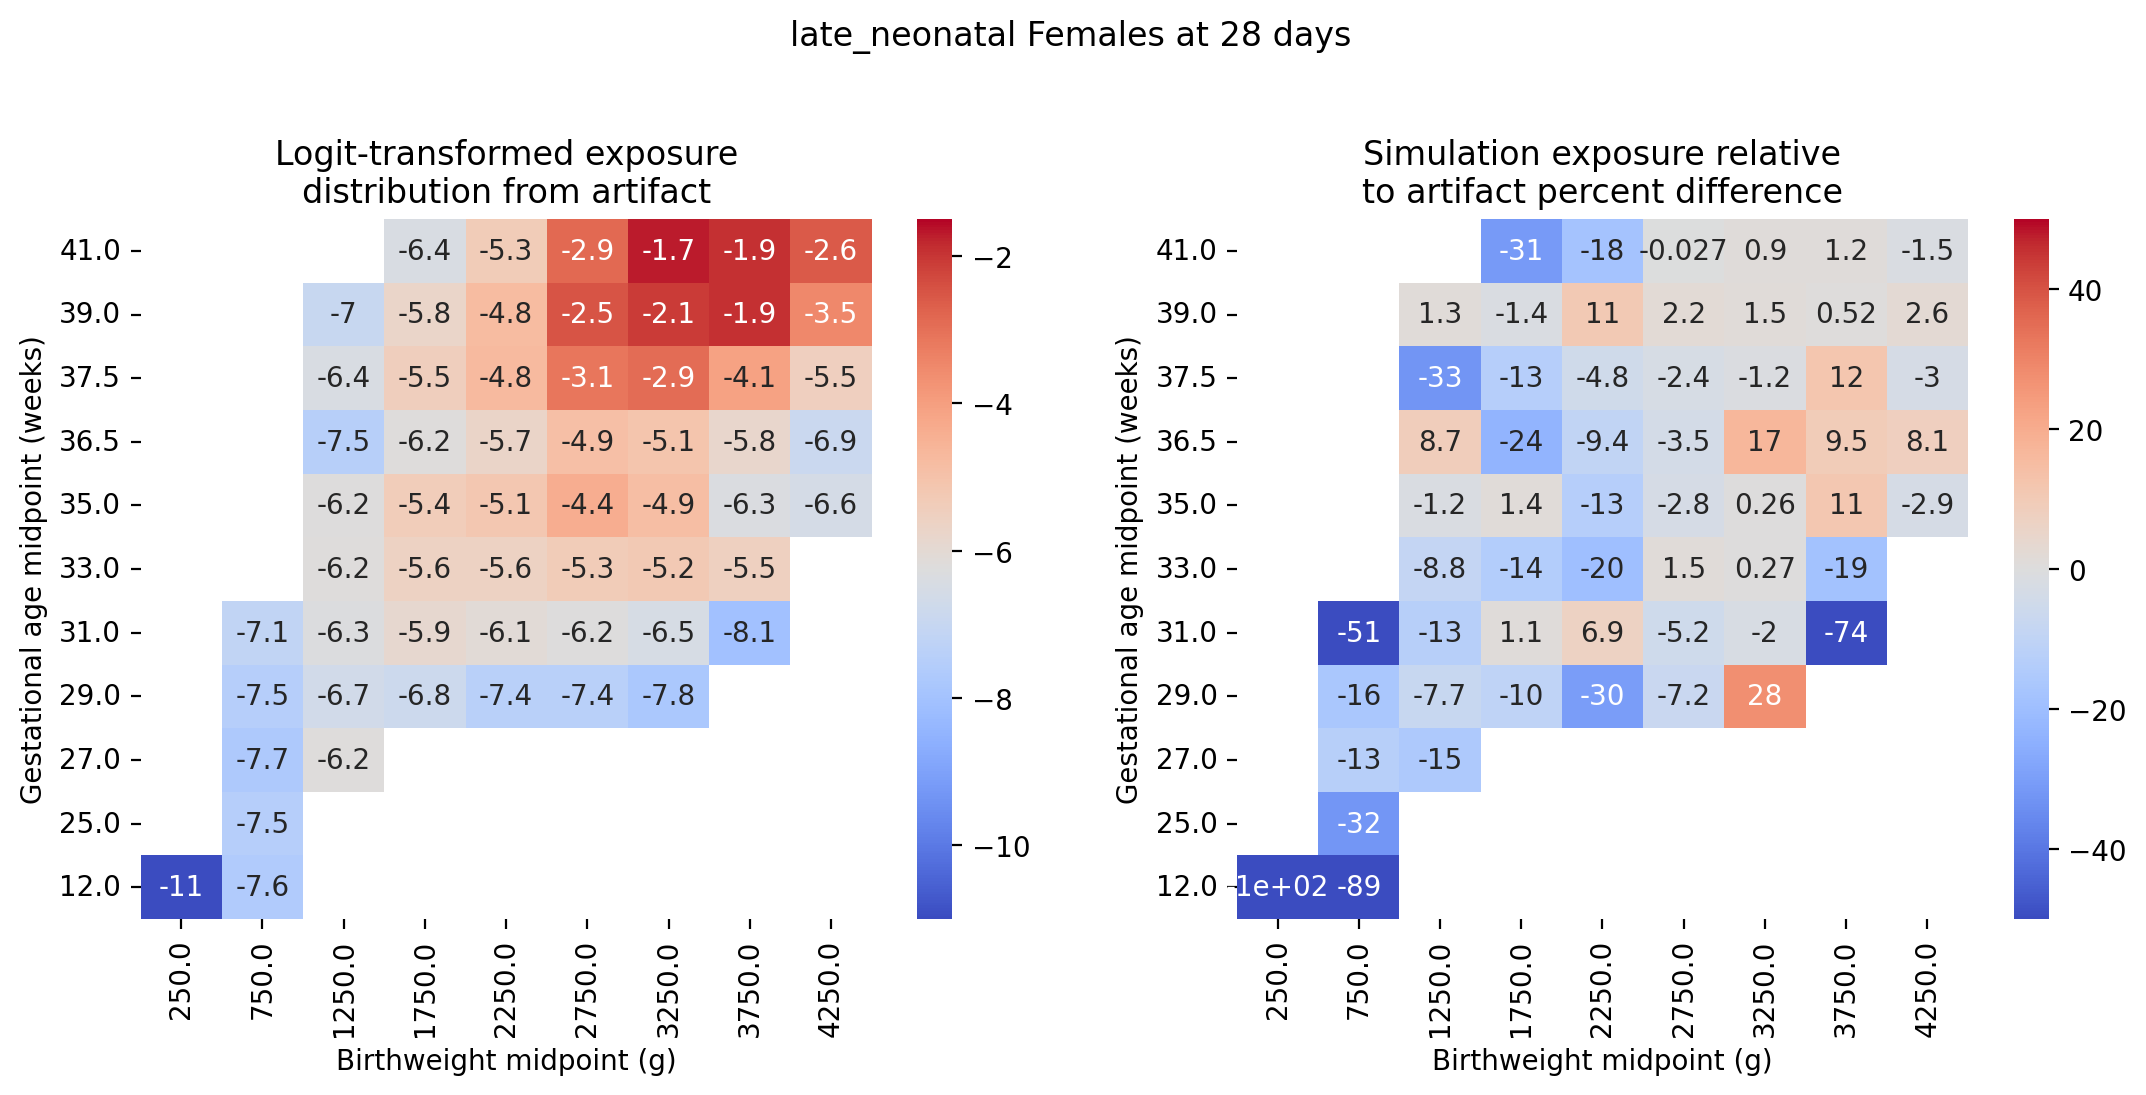

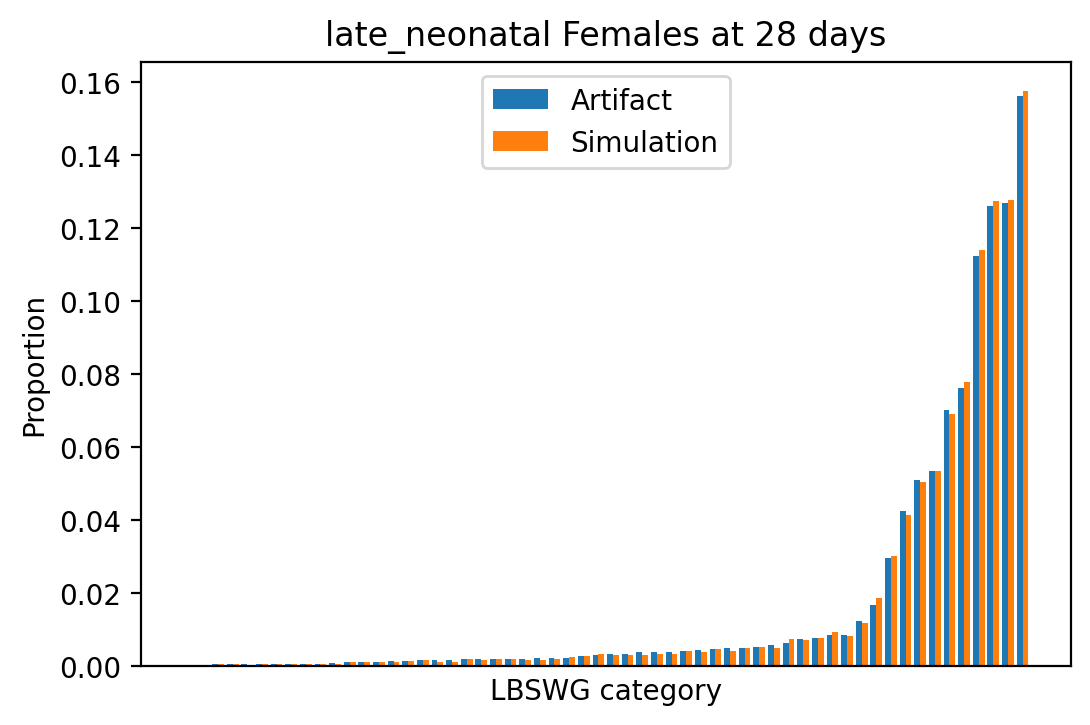

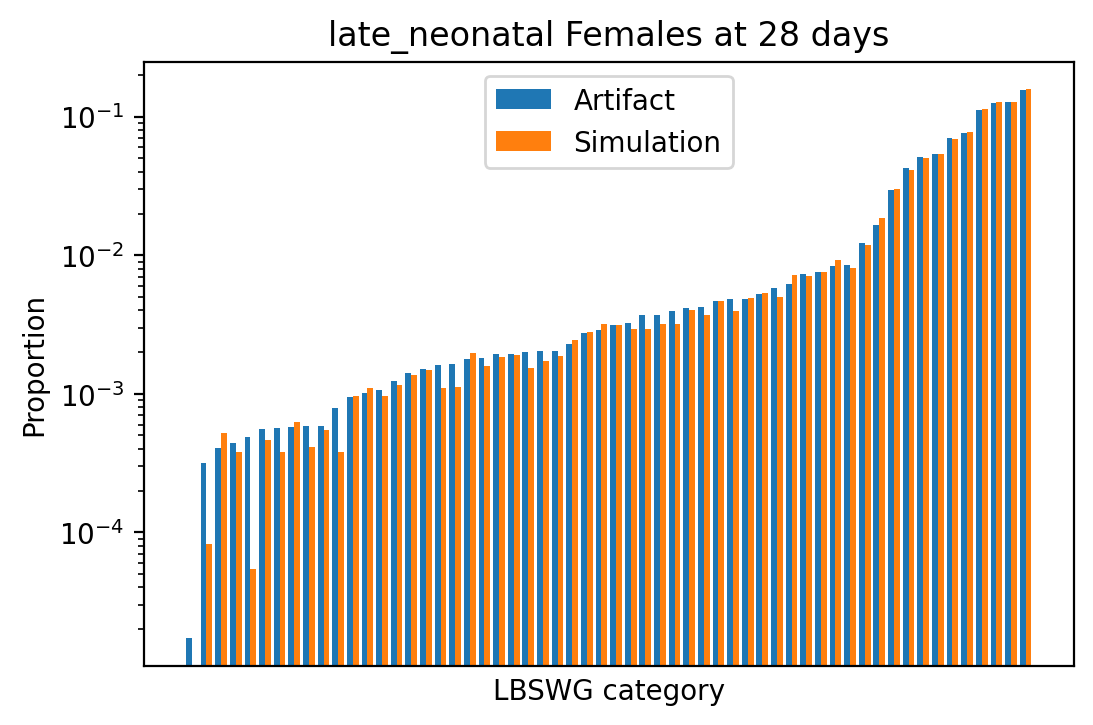

In [54]:
with PdfPages('model_5.1.2_lbwsg_exposure_updated.pdf') as pdf:

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev, 'at initialization')
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev, 'at initialization', log=False)
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev, 'at initialization', log=True)
            pdf.savefig(bbox_inches='tight')

    for sex in ['Male','Female']:
        for age_group in ['birth']:
            plot_exposure_heat_map(sex, age_group, births, 'at birth')
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, births, 'at birth', log=False)
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, births, 'at birth', log=True)
            pdf.savefig(bbox_inches='tight')
            
    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev1, 'at 28 days')
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev1, 'at 28 days', log=False)
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev1, 'at 28 days', log=True)
            pdf.savefig(bbox_inches='tight')
